# Stackoverflow Developer Survey Analysis 2022

## Introduction

##### The technological landscape is in a constant state of evolution, and understanding the pulse of developers around the world is crucial for staying ahead in this rapidly changing field. The Stack Overflow Developer Survey of 2022 offers an invaluable window into the preferences, practices, and perspectives of developers from various corners of the globe. This comprehensive survey provides an opportunity to delve into the minds of developers, uncovering trends, identifying shifts, and gaining insights that can shape the way we approach software development, team dynamics, and technology adoption.

##### Conducted annually, the Stack Overflow Developer Survey is one of the most anticipated reports in the tech industry. It captures a wide array of data, ranging from programming languages and frameworks to job satisfaction and work-life balance. By analyzing this dataset, we aim to uncover not only the technologies that are gaining prominence but also the aspirations and challenges faced by developers in their day-to-day endeavors.

##### In this analysis, we will explore the data collected from thousands of developers across the globe, painting a portrait of their experiences, preferences, and aspirations. We will navigate through the diverse roles, industries, and levels of expertise represented in the survey, shedding light on the factors that influence developer decisions, from the languages they choose to the environments they thrive in.

##### Our analysis will go beyond surface-level observations, aiming to extract meaningful insights through statistical techniques, visualizations, and exploratory examinations. By dissecting the survey results, we will unearth trends that transcend geographical boundaries and uncover hidden correlations that might influence how developers approach their craft. 

##### This analysis report will focus on technology trends and the devlopers preferred development environments and learning resources. Moreover, we will look over the salary trends across different programming languages, experience levels, geographic regions, and other factors. We will also focus on developer demographics such as age, gender, education, and geographic location and predict changes in the demographic composition of the developer community over time. Similarly, we wil focus on the remote work trends since, with the rise of remote work, the survey can help predict the prevalence of remote work among developers and how it's changing over the years. For this purpose, we will be using the previous developer survey, preferably of 2021 for a side-by-side comparison.

##### It is important to note that this analysis is not only a reflection of the developers' community but also a lens through which we can observe the broader technological shifts. As we embark on this journey through the Stack Overflow 2022 Developer Survey data, let us endeavor to gain a deeper understanding of the challenges, aspirations, and ever-evolving landscape that developers navigate, ultimately contributing to our collective knowledge of the world of software development.

##### This survey is based from 73,268 software developers from 180 countries around the world. This is the number of responses StackOverflow considers “qualified” for analytical purposes based on time spent on the full, completed survey. The survey was fielded from May 11, 2022 to June 1, 2022.

##### To read the details of the survey yourself, I highly recommend to visit the following site for a better understanding of this project! https://survey.stackoverflow.co/2022#overview 

## About the survey

##### Survey focused on below topics:
* Developer Profile / Respondent's profile:
* Education.
* Learning to code.
* Experience.
* Developer roles.
* Key territories.
* Demographics.
* Technology: Tools and technologies developers are currently using and what they want to use.
* Work: Respondent's employment, company info, salary, influence, hobby etc.
* Community: How people use Stack Overflow and how connected they feel to the StackOverflow community.
* Professional Developers: Respondent's Work lifestyle, work experience etc.
* Methodology: Feedback on survey.

## Understanding the data 

##### To understand the survey data, it is recommended to understand the schema and the methodology of the survey in the first place. There is another short notebook where I have a detailed overview of the schema which you can check as well!

#### Importing relevant libraries

In [1]:
import pandas as pd
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns
import numpy as np
import random
import re # importing regex to filter tweets
import nltk # improting natural language tool kit which contains the sentiment analyzer 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
# analyzer in the pre-built vader model to detect text polarity
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
import plotly.express as px
import plotly.graph_objs as go
import collections
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
# way to include images of maps!
from IPython import display
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
survey_df_raw = pd.read_csv(r'..\Stack Overflow Developer Survey 2022\survey_results_public.csv')
survey_df = survey_df_raw.copy()

In [4]:
survey_df.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0


In [5]:
survey_df.shape

(73268, 79)

In [6]:
survey_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [7]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [8]:
columns_to_keep = ['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
       'Accessibility', 'MentalHealth', 'TBranch', 'ICorPM', 'WorkExp',
       'TimeSearching', 'TimeAnswering', 'Onboarding', 'ProfessionalTech',
       'SurveyLength', 'SurveyEase', 'ConvertedCompYearly']

In [9]:
survey_df = survey_df[columns_to_keep]

In [10]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

## Technology Trends
##### Once the schema is understood we move forwards with our analyses. We will first dive into the technology trends to predict trends in programming languages, frameworks, libraries, and tools that are gaining or losing popularity among developers. This can be valuable for businesses and developers looking to make informed technology choices. 

In [11]:
trend_df = survey_df[['ResponseId', 'MainBranch', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith']]

In [12]:
# Define mapping for replacements
replacement_map_main = {
    'I am a developer by profession': 'Developer',
    'I am not primarily a developer, but I write code sometimes as part of my work': 'Non-developer coder',
    'I code primarily as a hobby': 'Hobbyist coder',
    'I am learning to code' : 'Coding learner',
    'I used to be a developer by profession, but no longer am' : 'Ex-developer'
}

# Replace values in the 'Main Branch' column using the map
trend_df['MainBranch'] = trend_df['MainBranch'].replace(replacement_map_main)

### Programming Languages

##### Note that there were a total of 42 unique programming languages in the survey.

In [13]:
# Split the values in the "LanguageHaveWorkedWith" column and create a set of unique languages
unique_languages = set()
for languages in trend_df["LanguageHaveWorkedWith"]:
    if isinstance(languages, str) and languages != "NA":
        unique_languages.update(languages.split(';'))

unique_languages_list = list(unique_languages)
print(len(unique_languages_list))

42


##### Although programming languages including Python, HTML, CSS, JavaScript, SQL, C# and PHP remain on the top of the list, developers are interested in using languages like Rust, Go and Kotlin. This indicates that these emergig languages may start to be of use in the industry in a few years!

In [14]:
trend_df['LanguageHaveWorkedWith'].value_counts().nlargest(10)

HTML/CSS;JavaScript;TypeScript           1250
Python                                    962
HTML/CSS;JavaScript                       914
HTML/CSS;JavaScript;PHP;SQL               745
C#;HTML/CSS;JavaScript;SQL;TypeScript     570
C#                                        541
Java                                      537
C#;HTML/CSS;JavaScript;SQL                520
HTML/CSS;JavaScript;Python                482
JavaScript;TypeScript                     479
Name: LanguageHaveWorkedWith, dtype: int64

In [15]:
trend_df['LanguageWantToWorkWith'].value_counts().nlargest(10)

Python                                   1021
HTML/CSS;JavaScript;TypeScript            945
Rust                                      825
C#                                        568
Go                                        495
Java                                      412
JavaScript;TypeScript                     402
HTML/CSS;JavaScript                       385
C#;HTML/CSS;JavaScript;SQL;TypeScript     383
Kotlin                                    364
Name: LanguageWantToWorkWith, dtype: int64

In [16]:
from collections import Counter
# Split the values in the "LanguageHaveWorkedWith" column and count the languages
language_counter = Counter()
for languages in trend_df["LanguageHaveWorkedWith"]:
    if isinstance(languages, str) and languages != "NA":
        language_counter.update(languages.split(';'))
# Create a DataFrame from the language counter
language_count_df_previous = pd.DataFrame.from_dict(language_counter, orient='index', columns=['Count'])

In [17]:
language_count_df_previous = language_count_df_previous.reset_index()
language_count_df_previous = language_count_df_previous.rename(columns = {'index' : 'Programming Language'})

In [18]:
language_count_df_previous.head(10)

,Programming Language,Count
0,JavaScript,46443
1,TypeScript,24752
2,C#,19883
3,C++,16024
4,HTML/CSS,39142
5,Python,34155
6,SQL,35127
7,Swift,3489
8,Lua,2867
9,PHP,14827


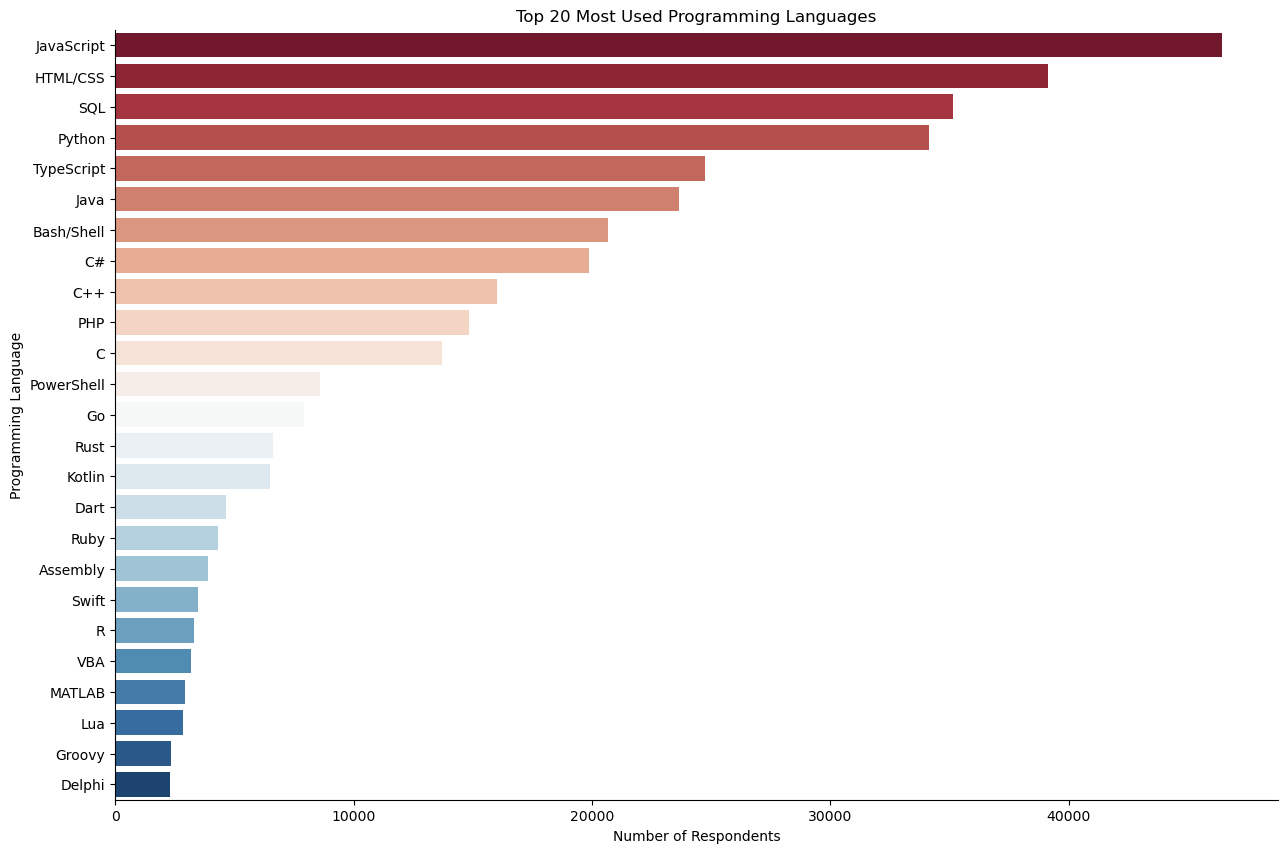

In [19]:
plt.figure(figsize=(15, 10))
sns.barplot(data = language_count_df_previous.sort_values(by = 'Count', ascending = False).head(25), x = 'Count' , y = 'Programming Language', palette= 'RdBu')
plt.title('Top 20 Most Used Programming Languages')
plt.xlabel('Number of Respondents')
sns.despine()

### Desired Programming Languages for the near future 

In [20]:
from collections import Counter
# Split the values in the 'LanguageWantToWorkWith' column and count the languages
language_counter = Counter()
for languages in trend_df['LanguageWantToWorkWith']:
    if isinstance(languages, str) and languages != "NA":
        language_counter.update(languages.split(';'))
# Create a DataFrame from the language counter
language_count_df_future = pd.DataFrame.from_dict(language_counter, orient='index', columns=['Count'])

In [21]:
language_count_df_future = language_count_df_future.reset_index()
language_count_df_future = language_count_df_future.rename(columns = {'index' : 'Programming Language'})

In [22]:
language_count_df_future.head(10)

,Programming Language,Count
0,Rust,17113
1,TypeScript,26050
2,C#,15681
3,C++,11896
4,HTML/CSS,25423
5,JavaScript,31551
6,SQL,24804
7,Elixir,3289
8,F#,1947
9,Go,15500


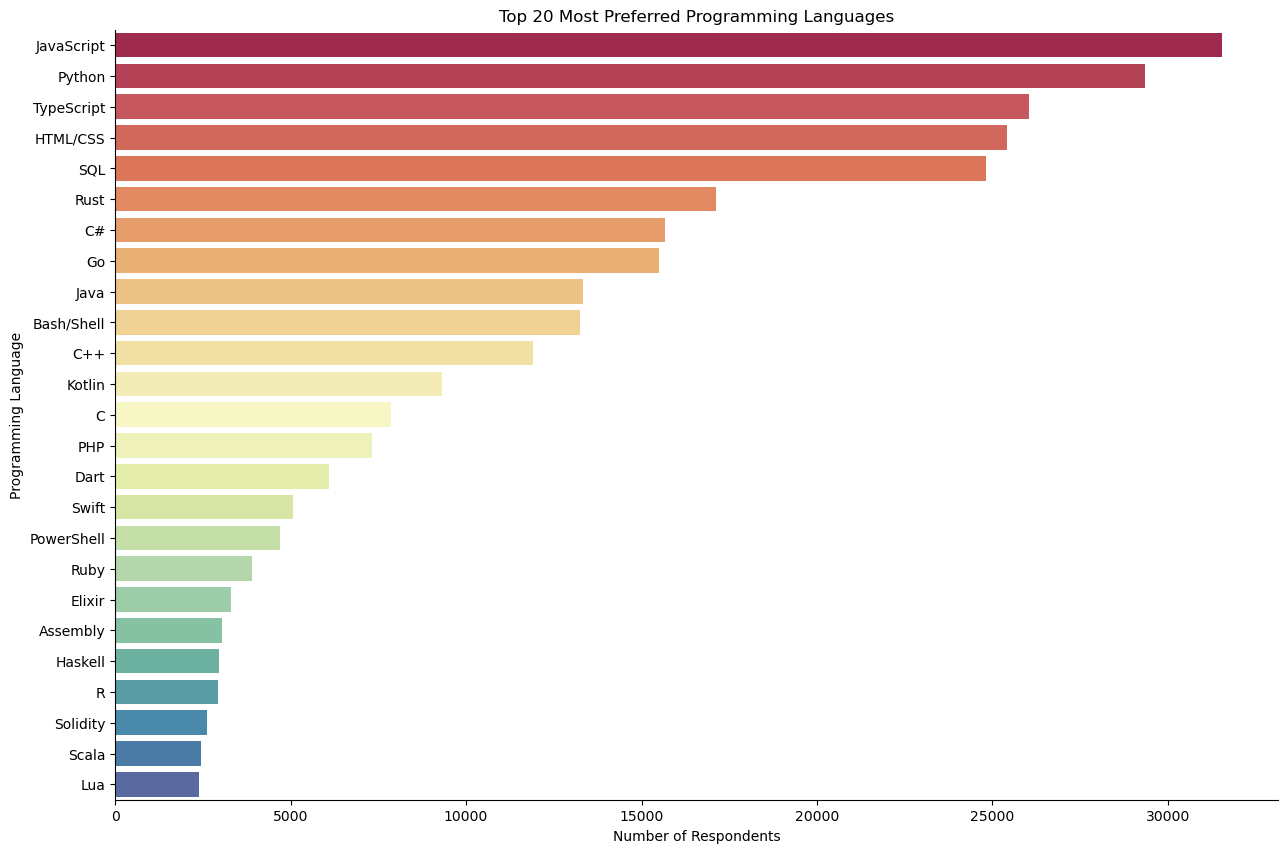

In [23]:
plt.figure(figsize=(15, 10))
sns.barplot(data = language_count_df_future.sort_values(by = 'Count', ascending = False).head(25), x = 'Count', y = 'Programming Language', palette = 'Spectral')
plt.title('Top 20 Most Preferred Programming Languages')
plt.xlabel('Number of Respondents')
sns.despine()

##### Looking at the data it is a valid question to ask, what languages are the most loved which the devlopers want in the industry?

In [24]:
languages_worked_df = split_multicolumn(survey_df['LanguageHaveWorkedWith'])
languages_interested_df = split_multicolumn(survey_df['LanguageWantToWorkWith'])
languages_loved_df = languages_worked_df & languages_interested_df
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False).head(15)

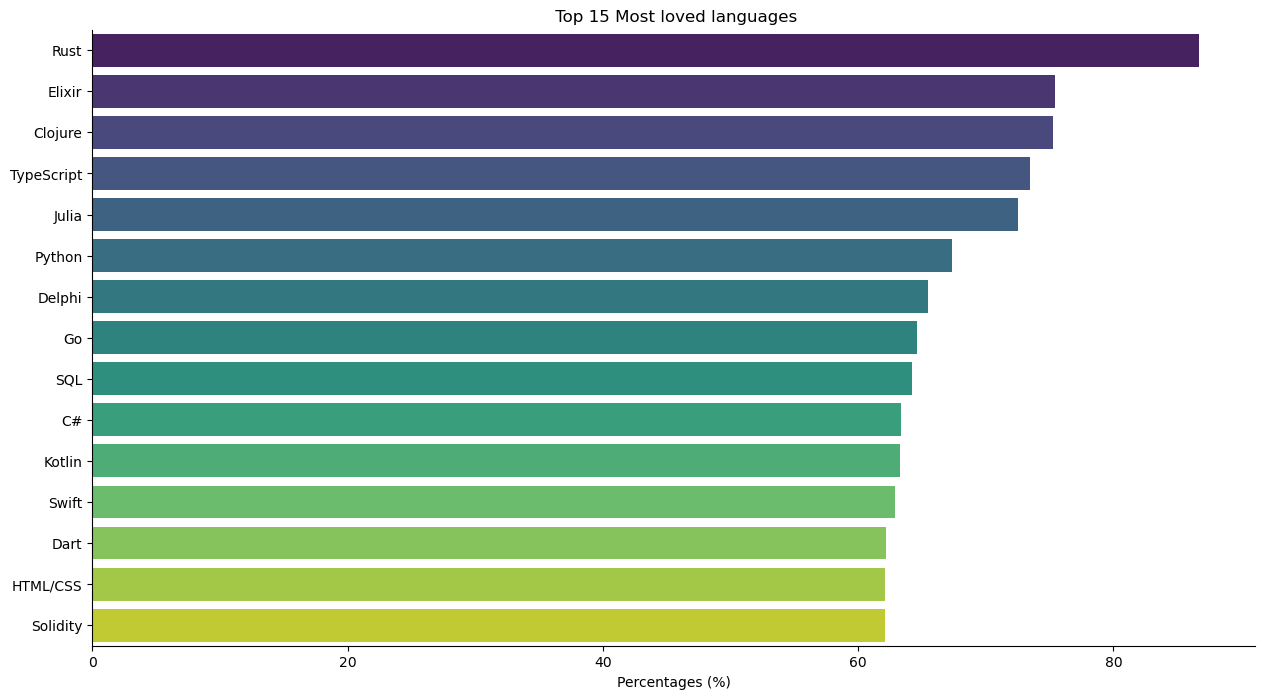

In [25]:
plt.figure(figsize=(15, 8))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index, palette = 'viridis')
plt.title(" Top 15 Most loved languages");
plt.xlabel('Percentages (%)');
sns.despine()

### Databases

In [26]:
# Split the values in the "DatabaseHaveWorkedWith" column and create a set of unique database names
unique_database = set()
for database in trend_df['DatabaseHaveWorkedWith']:
    if isinstance(database, str) and database != "NA":
        unique_database.update(database.split(';'))

unique_database_list = list(unique_database)
print(len(unique_database_list))

17


In [27]:
trend_df['DatabaseHaveWorkedWith'].value_counts().nlargest(10)

MySQL                   3563
PostgreSQL              3519
Microsoft SQL Server    3238
SQLite                  2022
MongoDB                 1655
PostgreSQL;SQLite       1123
MySQL;SQLite            1025
MySQL;PostgreSQL         998
MongoDB;MySQL            990
PostgreSQL;Redis         980
Name: DatabaseHaveWorkedWith, dtype: int64

In [28]:
# Split the values in the "DatabaseHaveWorkedWith" column and count the languages
database_counter = Counter()
for database in trend_df["DatabaseHaveWorkedWith"]:
    if isinstance(database, str) and database != "NA":
        database_counter.update(database.split(';'))
# Create a DataFrame from the language counter
database_count_df_previous = pd.DataFrame.from_dict(database_counter, orient='index', columns=['Count'])

In [29]:
database_count_df_previous = database_count_df_previous.reset_index()
database_count_df_previous = database_count_df_previous.rename(columns = {'index' : 'Database'})

In [30]:
database_count_df_previous.sort_values(by = 'Count', ascending = False).head(10)

,Database,Count
5,MySQL,28520
8,PostgreSQL,26538
12,SQLite,19487
4,MongoDB,17228
0,Microsoft SQL Server,16355
9,Redis,13471
14,MariaDB,10912
2,Elasticsearch,7430
15,Oracle,6994
3,Firebase Realtime Database,5309


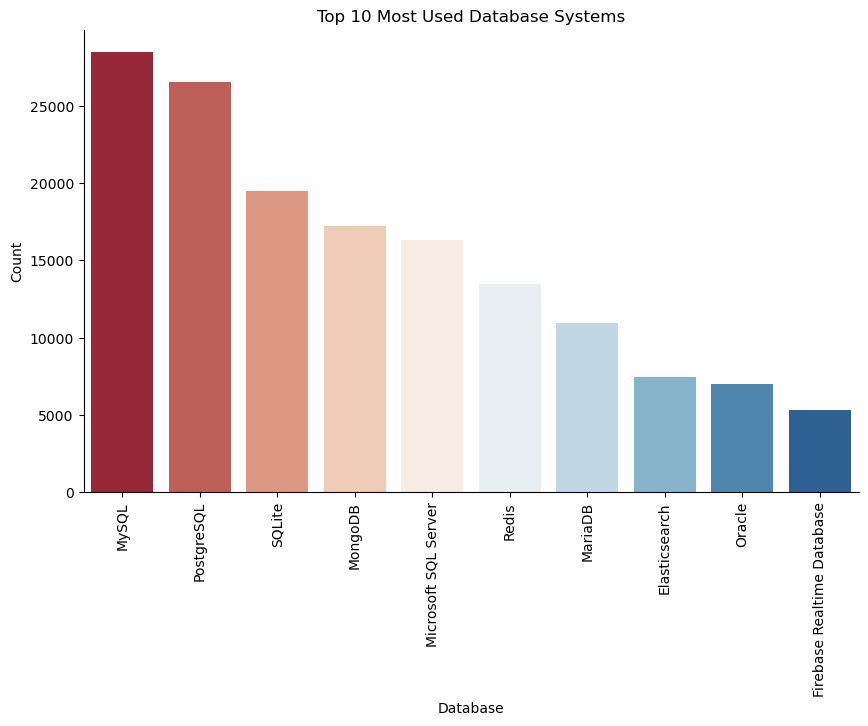

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data = database_count_df_previous.sort_values(by = 'Count', ascending = False).head(10), x = 'Database', y = 'Count', palette = 'RdBu')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Used Database Systems')
sns.despine()

In [32]:
# Split the values in the "DatabaseHaveWorkedWith" column and count the languages
database_counter = Counter()
for database in trend_df["DatabaseWantToWorkWith"]:
    if isinstance(database, str) and database != "NA":
        database_counter.update(database.split(';'))
# Create a DataFrame from the language counter
database_count_df_future = pd.DataFrame.from_dict(database_counter, orient='index', columns=['Count'])

In [33]:
database_count_df_future = database_count_df_future.reset_index()
database_count_df_future = database_count_df_future.rename(columns = {'index' : 'Database'})

In [34]:
database_count_df_future.sort_values(by = 'Count', ascending = False).head(10)

,Database,Count
7,PostgreSQL,25212
9,MongoDB,17297
5,MySQL,16271
4,Redis,16211
10,SQLite,14085
0,Microsoft SQL Server,9867
2,Elasticsearch,8533
11,MariaDB,7181
3,Firebase Realtime Database,5312
14,DynamoDB,5309


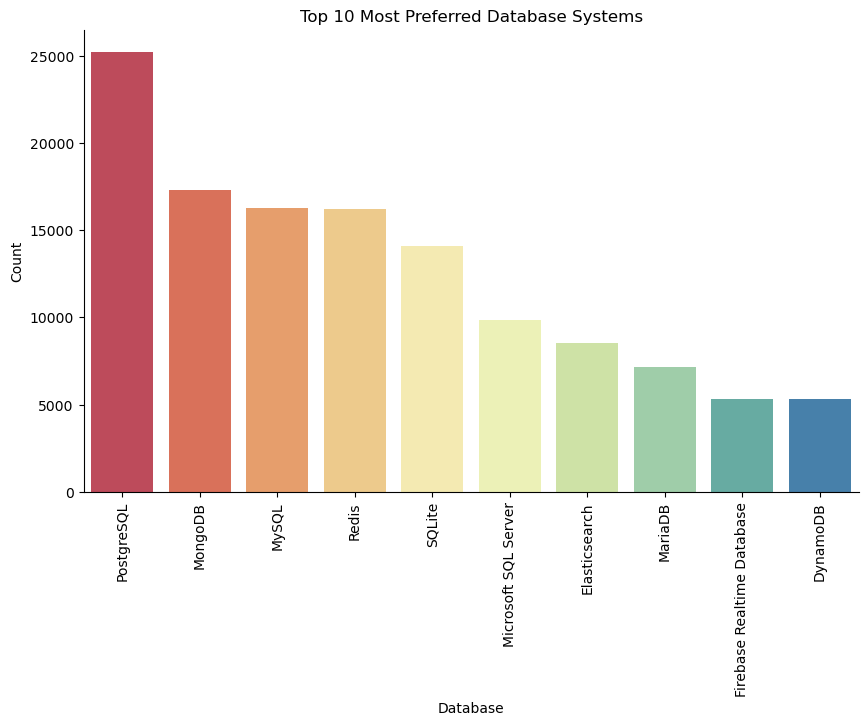

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data = database_count_df_future.sort_values(by = 'Count', ascending = False).head(10), x = 'Database', y = 'Count', palette = 'Spectral')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Preferred Database Systems')
sns.despine()

In [36]:
database_worked_df = split_multicolumn(survey_df["DatabaseHaveWorkedWith"])
database_interested_df = split_multicolumn(survey_df["DatabaseWantToWorkWith"])
database_loved_df = database_worked_df & database_interested_df
database_loved_percentages = (database_loved_df.sum() * 100/ database_worked_df.sum()).sort_values(ascending=False).head(15)

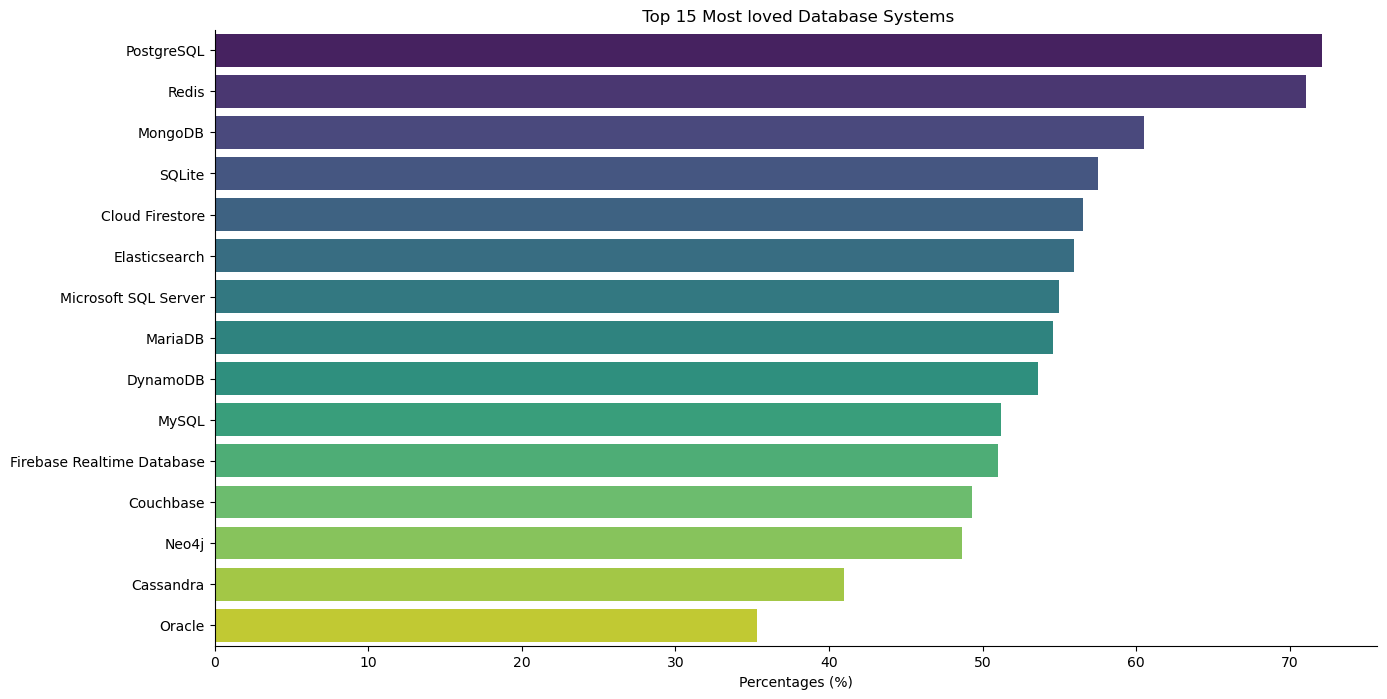

In [37]:
plt.figure(figsize=(15, 8))
sns.barplot(x=database_loved_percentages, y=database_loved_percentages.index, palette = 'viridis')
plt.title(" Top 15 Most loved Database Systems");
plt.xlabel('Percentages (%)');
sns.despine()

### Platform

In [38]:
# Split the values in the "PlatformHaveWorkedWith" column and create a set of unique database names
unique_platform = set()
for platform in trend_df['PlatformHaveWorkedWith']:
    if isinstance(platform, str) and platform != "NA":
        unique_platform.update(platform.split(';'))

unique_platform_list = list(unique_platform)
print(len(unique_platform_list))

14


In [39]:
trend_df['PlatformHaveWorkedWith'].value_counts().nlargest(10)

AWS                    8719
Microsoft Azure        4989
Google Cloud           2306
AWS;Microsoft Azure    2039
Heroku                 2003
Firebase               1951
AWS;Google Cloud       1695
AWS;Heroku             1195
DigitalOcean           1122
AWS;DigitalOcean        949
Name: PlatformHaveWorkedWith, dtype: int64

In [40]:
# Split the values in the "DatabaseHaveWorkedWith" column and count the languages
platform_counter = Counter()
for platform in trend_df["PlatformHaveWorkedWith"]:
    if isinstance(platform, str) and platform != "NA":
        platform_counter.update(platform.split(';'))
# Create a DataFrame from the language counter
platform_count_df_previous = pd.DataFrame.from_dict(platform_counter, orient='index', columns=['Count'])

In [41]:
platform_count_df_previous = platform_count_df_previous.reset_index()
platform_count_df_previous = platform_count_df_previous.rename(columns = {'index' : 'Platform'})

In [42]:
platform_count_df_previous.sort_values(by = 'Count', ascending = False).head(10)

,Platform,Count
2,AWS,25939
1,Microsoft Azure,14604
3,Google Cloud,13634
0,Firebase,10751
4,Heroku,10160
5,DigitalOcean,7953
6,VMware,4429
9,Managed Hosting,2927
8,Linode,1994
7,OVH,1913


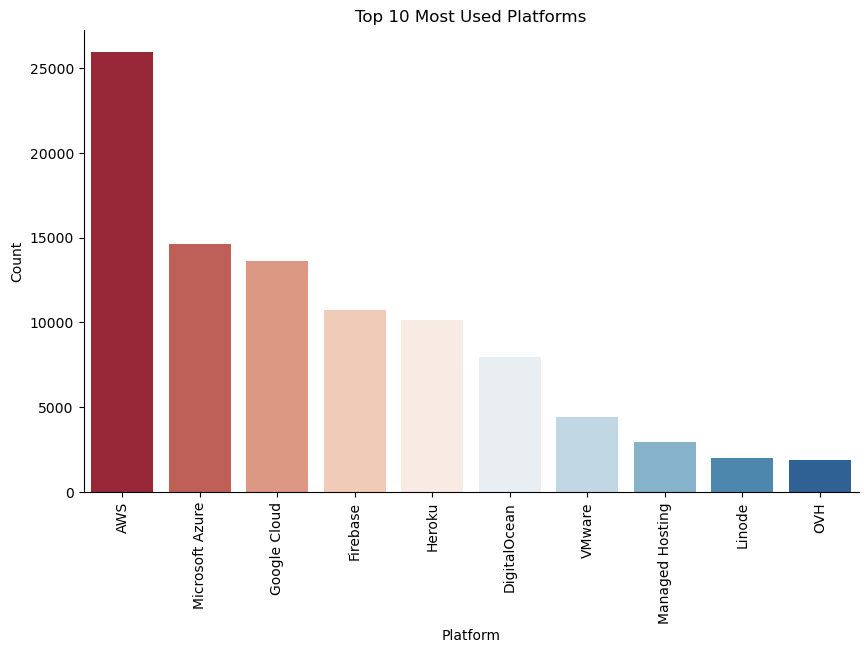

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data = platform_count_df_previous.sort_values(by = 'Count', ascending = False).head(10), x = 'Platform', y = 'Count', palette = 'RdBu')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Used Platforms')
sns.despine()

In [44]:
trend_df['PlatformWantToWorkWith'].value_counts().nlargest(10)

AWS                                 7350
Microsoft Azure                     3568
AWS;Google Cloud                    2025
AWS;Microsoft Azure                 2000
Google Cloud                        1957
AWS;Google Cloud;Microsoft Azure    1263
Firebase                            1217
DigitalOcean                        1197
AWS;DigitalOcean                     837
Heroku                               808
Name: PlatformWantToWorkWith, dtype: int64

In [45]:
# Split the values in the "PlatformWantToWorkWith" column and count the languages
platform_counter = Counter()
for platform in trend_df["PlatformWantToWorkWith"]:
    if isinstance(platform, str) and platform != "NA":
        platform_counter.update(platform.split(';'))
# Create a DataFrame from the language counter
platform_count_df_future = pd.DataFrame.from_dict(platform_counter, orient='index', columns=['Count'])

In [46]:
platform_count_df_future = platform_count_df_future.reset_index()
platform_count_df_future = platform_count_df_future.rename(columns = {'index' : 'Platform'})

In [47]:
platform_count_df_future.sort_values(by = 'Count', ascending = False).head(10)

,Platform,Count
4,AWS,23701
6,Google Cloud,13394
1,Microsoft Azure,12785
0,Firebase,8643
2,DigitalOcean,6983
7,Heroku,5951
3,VMware,2495
5,Linode,2259
10,Managed Hosting,1887
9,OpenStack,1385


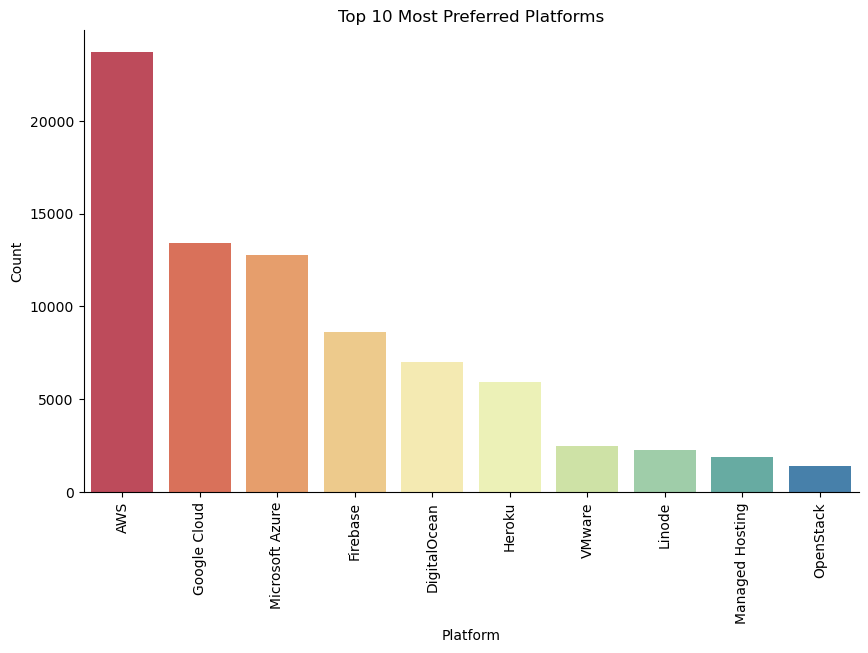

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data = platform_count_df_future.sort_values(by = 'Count', ascending = False).head(10), x = 'Platform', y = 'Count', palette = 'Spectral')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Preferred Platforms')
sns.despine()

### Web framework

In [49]:
trend_df.columns

Index(['ResponseId', 'MainBranch', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith'],
      dtype='object')

In [50]:
# Split the values in the 'WebframeHaveWorkedWith' column and create a set of unique database names
unique_web = set()
for web in trend_df['WebframeHaveWorkedWith']:
    if isinstance(web, str) and web != "NA":
        unique_web.update(web.split(';'))

unique_web_list = list(unique_web)
print(len(unique_web_list))

25


In [51]:
trend_df['WebframeHaveWorkedWith'].value_counts().nlargest(10)

React.js                    1959
Node.js                     1507
jQuery                      1445
Node.js;React.js            1303
Flask                       1258
Express;Node.js;React.js    1109
Django                      1079
Angular                     1055
ASP.NET Core                 722
ASP.NET;ASP.NET Core         710
Name: WebframeHaveWorkedWith, dtype: int64

In [52]:
# Split the values in the 'WebframeHaveWorkedWith' column and count the languages
web_counter = Counter()
for web in trend_df['WebframeHaveWorkedWith']:
    if isinstance(web, str) and web != "NA":
        web_counter.update(web.split(';'))
# Create a DataFrame from the language counter
web_count_df_previous = pd.DataFrame.from_dict(web_counter, orient='index', columns=['Count'])

In [53]:
web_count_df_previous = web_count_df_previous.reset_index()
web_count_df_previous = web_count_df_previous.rename(columns = {'index' : 'Webframe'})

In [54]:
web_count_df_previous.sort_values(by = 'Count', ascending = False).head(10)

,Webframe,Count
5,Node.js,25733
7,React.js,23277
4,jQuery,15602
10,Express,12557
3,Angular,11138
9,Vue.js,10278
2,ASP.NET Core,10155
1,ASP.NET,8139
13,Django,8002
14,Flask,7994


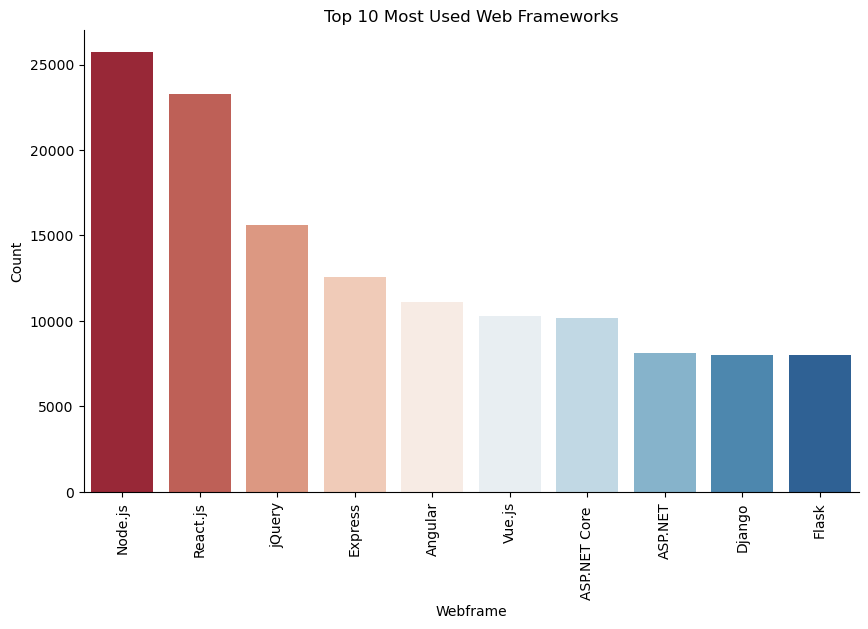

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data = web_count_df_previous.sort_values(by = 'Count', ascending = False).head(10), x = 'Webframe', y = 'Count', palette = 'RdBu')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Used Web Frameworks')
sns.despine()

In [56]:
trend_df['WebframeWantToWorkWith'].value_counts().nlargest(10)

React.js                    1703
Node.js;React.js            1026
Node.js                      972
Angular                      720
Django                       702
ASP.NET Core                 696
Vue.js                       689
ASP.NET Core ;Blazor         670
Next.js;Node.js;React.js     625
Express;Node.js;React.js     598
Name: WebframeWantToWorkWith, dtype: int64

In [57]:
# Split the values in the 'WebframeWantToWorkWith' column and count the languages
web_counter = Counter()
for web in trend_df['WebframeWantToWorkWith']:
    if isinstance(web, str) and web != "NA":
        web_counter.update(web.split(';'))
# Create a DataFrame from the web counter
web_count_df_future = pd.DataFrame.from_dict(web_counter, orient='index', columns=['Count'])

In [58]:
web_count_df_future = web_count_df_future.reset_index()
web_count_df_future = web_count_df_future.rename(columns = {'index' : 'Webframe'})

In [59]:
web_count_df_previous.sort_values(by = 'Count', ascending = False).head(10)

,Webframe,Count
5,Node.js,25733
7,React.js,23277
4,jQuery,15602
10,Express,12557
3,Angular,11138
9,Vue.js,10278
2,ASP.NET Core,10155
1,ASP.NET,8139
13,Django,8002
14,Flask,7994


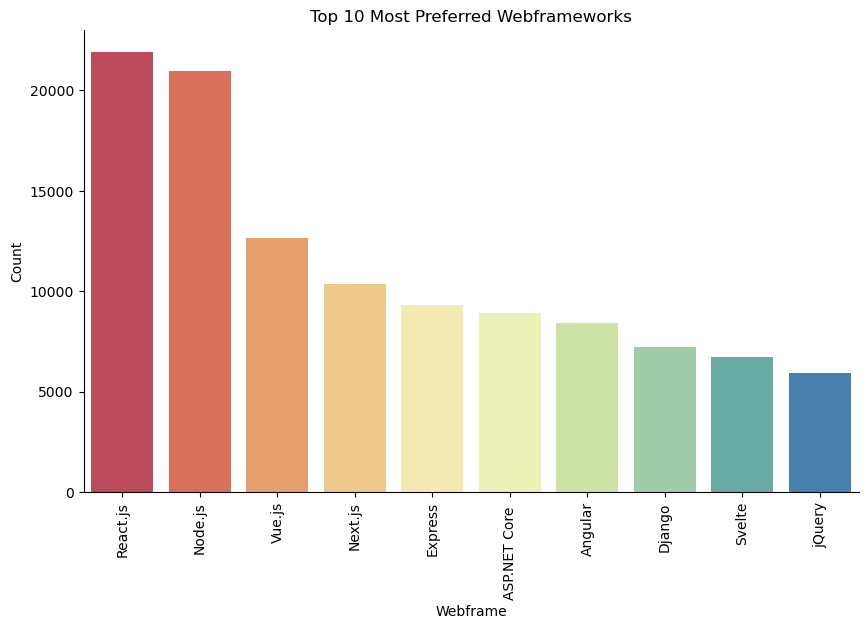

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(data = web_count_df_future.sort_values(by = 'Count', ascending = False).head(10), x = 'Webframe', y = 'Count', palette = 'Spectral')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Preferred Webframeworks')
sns.despine()

### Collaboration Tools

In [61]:
# Split the values in the "DatabaseHaveWorkedWith" column and create a set of unique database names
unique_tool = set()
for tool in trend_df['NEWCollabToolsHaveWorkedWith']:
    if isinstance(tool, str) and tool != "NA":
        unique_tool.update(tool.split(';'))

unique_tool_list = list(unique_tool)
print(len(unique_tool_list))

27


In [62]:
trend_df['NEWCollabToolsHaveWorkedWith'].value_counts().nlargest(10)

Visual Studio Code                            6753
Visual Studio;Visual Studio Code              2930
Notepad++;Visual Studio;Visual Studio Code    1959
Vim;Visual Studio Code                        1432
IntelliJ;Visual Studio Code                   1204
Visual Studio                                  734
Vim                                            728
IntelliJ                                       689
Notepad++;Visual Studio Code                   683
Sublime Text;Visual Studio Code                625
Name: NEWCollabToolsHaveWorkedWith, dtype: int64

In [63]:
# Split the values in the 'NEWCollabToolsHaveWorkedWith' column and count the languages
tool_counter = Counter()
for tool in trend_df['NEWCollabToolsHaveWorkedWith']:
    if isinstance(tool, str) and tool != "NA":
        tool_counter.update(tool.split(';'))
# Create a DataFrame from the language counter
tool_count_df_previous = pd.DataFrame.from_dict(tool_counter, orient='index', columns=['Count'])

In [64]:
tool_count_df_previous = tool_count_df_previous.reset_index()
tool_count_df_previous = tool_count_df_previous.rename(columns = {'index' : 'Tools'})

In [65]:
tool_count_df_previous.sort_values(by = 'Count', ascending = False).head(10)

,Tools,Count
2,Visual Studio Code,52523
1,Visual Studio,22673
5,IntelliJ,19723
0,Notepad++,19543
16,Vim,16458
11,Android Studio,13963
6,PyCharm,12158
7,Sublime Text,11698
9,Eclipse,8866
14,IPython/Jupyter,8188


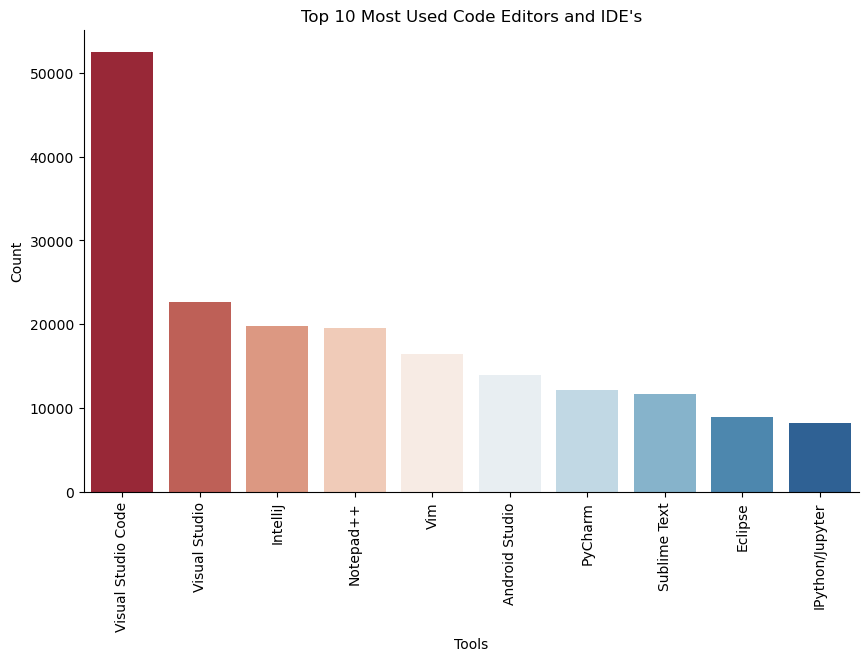

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(data = tool_count_df_previous.sort_values(by = 'Count', ascending = False).head(10), x = 'Tools', y = 'Count', palette = 'RdBu')
plt.xticks(rotation = 90)
plt.title("Top 10 Most Used Code Editors and IDE's")
sns.despine()

In [67]:
trend_df['NEWCollabToolsWantToWorkWith'].value_counts().nlargest(10)

Visual Studio Code                            8815
Visual Studio;Visual Studio Code              2907
Vim;Visual Studio Code                        1794
Notepad++;Visual Studio;Visual Studio Code    1519
IntelliJ;Visual Studio Code                   1360
Vim                                            993
IntelliJ                                       961
Neovim                                         861
Visual Studio                                  767
Notepad++;Visual Studio Code                   741
Name: NEWCollabToolsWantToWorkWith, dtype: int64

In [68]:
# Split the values in the "DatabaseHaveWorkedWith" column and count the languages
tool_counter = Counter()
for tool in trend_df['NEWCollabToolsWantToWorkWith']:
    if isinstance(tool, str) and tool != "NA":
        tool_counter.update(tool.split(';'))
# Create a DataFrame from the language counter
tool_count_df_future = pd.DataFrame.from_dict(tool_counter, orient='index', columns=['Count'])

In [69]:
tool_count_df_future = tool_count_df_future.reset_index()
tool_count_df_future = tool_count_df_future.rename(columns = {'index' : 'Tools'})

In [70]:
tool_count_df_future.sort_values(by = 'Count', ascending = False).head(10)

,Tools,Count
2,Visual Studio Code,44282
13,IntelliJ,15040
1,Visual Studio,14958
8,Vim,12862
0,Notepad++,11734
5,Android Studio,9096
14,PyCharm,8882
7,Sublime Text,6370
6,IPython/Jupyter,6224
11,Xcode,5780


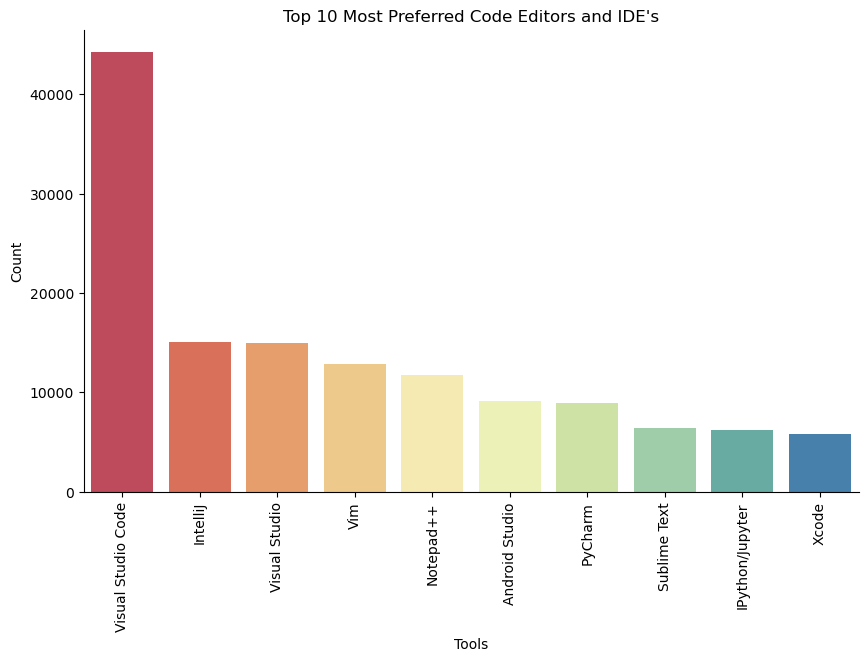

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data = tool_count_df_future.sort_values(by = 'Count', ascending = False).head(10), x = 'Tools', y = 'Count', palette = 'Spectral')
plt.xticks(rotation = 90)
plt.title("Top 10 Most Preferred Code Editors and IDE's")
sns.despine()

### Office Communication Tools/softwares : Asynchronous

In [72]:
# Split the values in the 'OfficeStackAsyncHaveWorkedWith' column and create a set of unique database names
unique_office = set()
for office in trend_df['OfficeStackAsyncHaveWorkedWith']:
    if isinstance(office, str) and office != "NA":
        unique_office.update(office.split(';'))

unique_office_list = list(unique_office)
print(len(unique_office_list))

21


In [73]:
trend_df['OfficeStackAsyncHaveWorkedWith'].value_counts().nlargest(10)

Confluence;Jira Work Management           7084
Jira Work Management                      6059
Trello                                    4953
Confluence                                3791
Notion                                    2577
Confluence;Jira Work Management;Trello    1966
Jira Work Management;Trello               1778
Notion;Trello                             1166
Confluence;Trello                          871
Confluence;Jira Work Management;Notion     783
Name: OfficeStackAsyncHaveWorkedWith, dtype: int64

In [74]:
# Split the values in the 'OfficeStackAsyncHaveWorkedWith' column and count the languages
office_counter = Counter()
for office in trend_df['OfficeStackAsyncHaveWorkedWith']:
    if isinstance(office, str) and office != "NA":
        office_counter.update(office.split(';'))
# Create a DataFrame from the language counter
office_count_df_previous = pd.DataFrame.from_dict(office_counter, orient='index', columns=['Count'])

In [75]:
office_count_df_previous = office_count_df_previous.reset_index()
office_count_df_previous = office_count_df_previous.rename(columns = {'index' : 'Office Tools'})

In [76]:
office_count_df_previous.sort_values(by = 'Count', ascending = False).head(10)

,Office Tools,Count
0,Jira Work Management,24234
2,Confluence,19496
1,Trello,16324
3,Notion,9711
5,Asana,3874
7,ClickUp,2704
9,Microsoft Planner,2282
8,Stack Overflow for Teams,1804
6,monday.com,1639
4,Airtable,1438


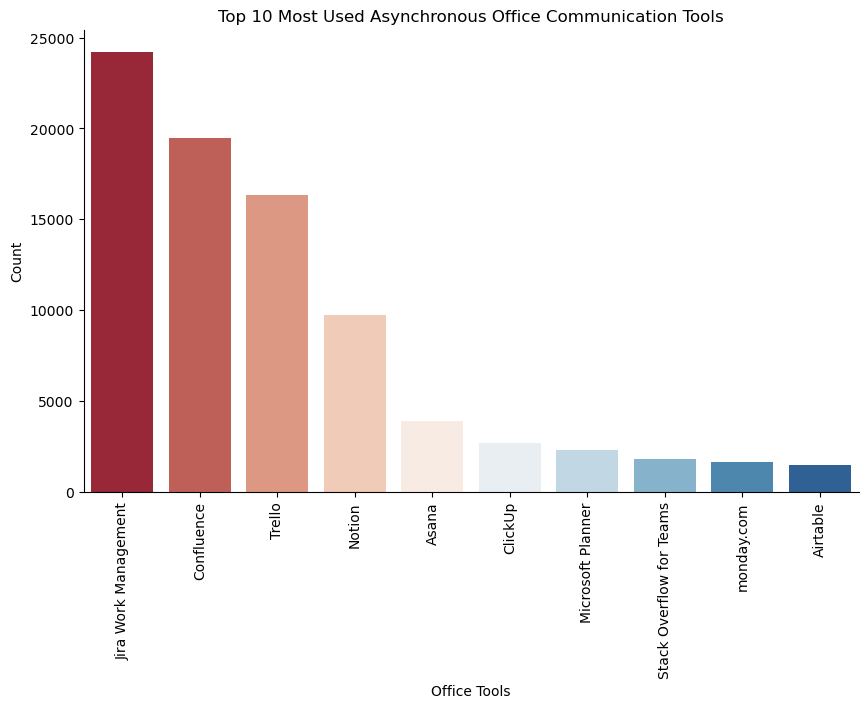

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(data = office_count_df_previous.sort_values(by = 'Count', ascending = False).head(10), x = 'Office Tools', y = 'Count', palette = 'RdBu')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Used Asynchronous Office Communication Tools')
sns.despine()

In [78]:
trend_df['OfficeStackAsyncWantToWorkWith'].value_counts().nlargest(10)

Jira Work Management                      4737
Confluence;Jira Work Management           4356
Trello                                    3671
Notion                                    3353
Confluence                                2484
Jira Work Management;Trello                965
Notion;Trello                              839
ClickUp                                    697
Confluence;Jira Work Management;Trello     685
Stack Overflow for Teams                   668
Name: OfficeStackAsyncWantToWorkWith, dtype: int64

In [79]:
# Split the values in the 'OfficeStackAsyncWantToWorkWith' column and count the languages
office_counter = Counter()
for office in trend_df['OfficeStackAsyncWantToWorkWith']:
    if isinstance(office, str) and office != "NA":
        office_counter.update(office.split(';'))
# Create a DataFrame from the language counter
office_count_df_future = pd.DataFrame.from_dict(office_counter, orient='index', columns=['Count'])

In [80]:
office_count_df_future = office_count_df_future.reset_index()
office_count_df_future = office_count_df_future.rename(columns = {'index' : 'Office Tools'})

In [81]:
office_count_df_future.sort_values(by = 'Count', ascending = False).head(10)

,Office Tools,Count
0,Jira Work Management,14695
2,Confluence,10568
1,Trello,8968
3,Notion,7923
6,Stack Overflow for Teams,2440
4,Asana,1973
8,ClickUp,1808
11,Microsoft Planner,1379
5,monday.com,1024
7,Airtable,997


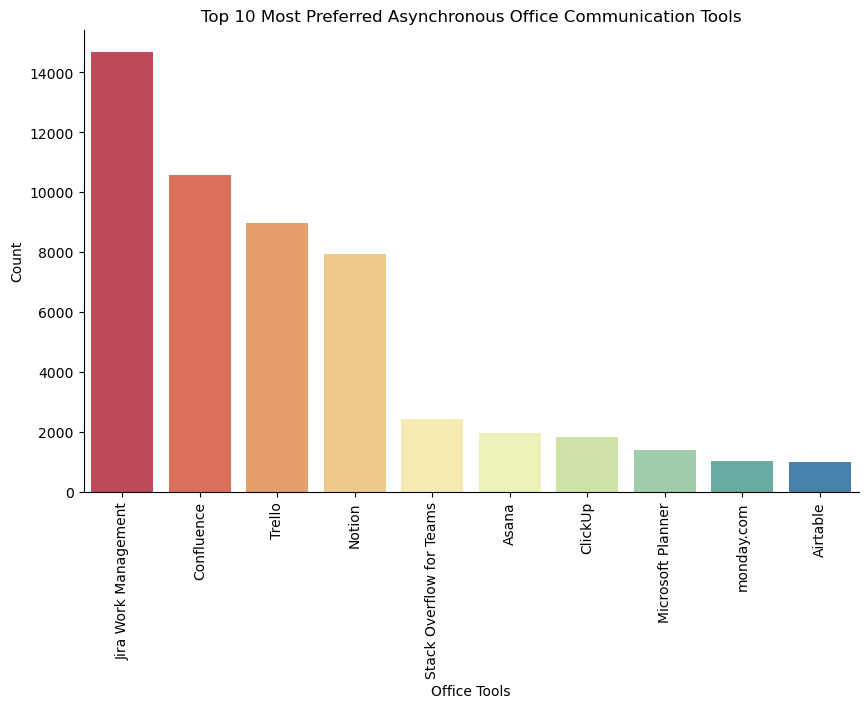

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(data = office_count_df_future.sort_values(by = 'Count', ascending = False).head(10), x = 'Office Tools', y = 'Count', palette = 'Spectral')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Preferred Asynchronous Office Communication Tools')
sns.despine()

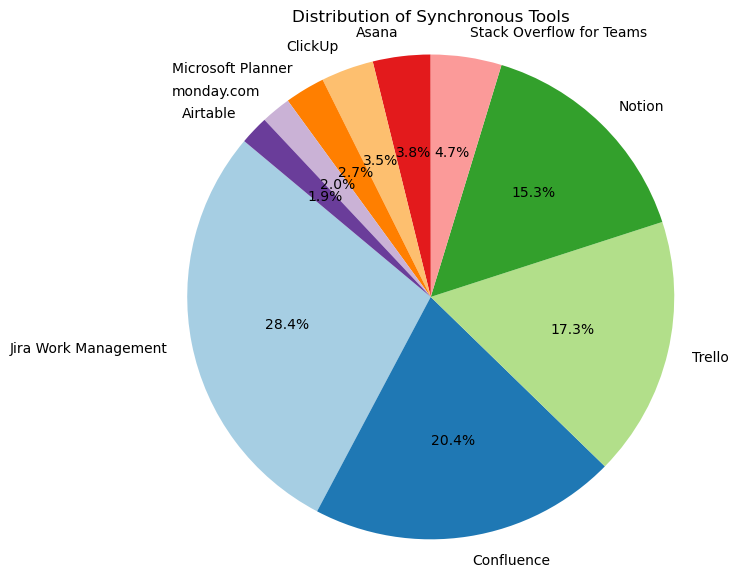

In [83]:
# Create a pie chart
data = office_count_df_future.sort_values(by = 'Count', ascending = False).head(10)
plt.figure(figsize=(7, 7))
plt.pie(data['Count'], labels=data['Office Tools'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Synchronous Tools')
plt.show()

### Office Communication Tools/softwares : Synchronous

In [84]:
# Split the values in the 'OfficeStackSyncHaveWorkedWith' column and create a set of unique database names
unique_office_sy = set()
for office_sy in trend_df['OfficeStackSyncHaveWorkedWith']:
    if isinstance(office_sy, str) and office_sy != "NA":
        unique_office_sy.update(office_sy.split(';'))

unique_office_sy_list = list(unique_office_sy)
print(len(unique_office_sy_list))

13


In [85]:
trend_df['OfficeStackSyncHaveWorkedWith'].value_counts().nlargest(10)

Microsoft Teams                           9257
Slack;Zoom                                7722
Microsoft Teams;Slack;Zoom                6068
Slack                                     5334
Microsoft Teams;Zoom                      5159
Microsoft Teams;Slack                     4039
Zoom                                      3834
Google Chat;Microsoft Teams;Slack;Zoom    2323
Google Chat;Slack;Zoom                    2030
Google Chat                               1322
Name: OfficeStackSyncHaveWorkedWith, dtype: int64

In [86]:
# Split the values in the 'OfficeStackSyncHaveWorkedWith' column and count the languages
office_sy_counter = Counter()
for office_sy in trend_df['OfficeStackSyncHaveWorkedWith']:
    if isinstance(office_sy, str) and office_sy != "NA":
        office_sy_counter.update(office_sy.split(';'))
# Create a DataFrame from the language counter
office_sy_count_df_previous = pd.DataFrame.from_dict(office_sy_counter, orient='index', columns=['Count'])

In [87]:
office_sy_count_df_previous = office_sy_count_df_previous.reset_index()
office_sy_count_df_previous = office_sy_count_df_previous.rename(columns = {'index' : 'Office Synchronous Tools'})

In [88]:
office_sy_count_df_previous.sort_values(by = 'Count', ascending = False).head(10)

,Office Synchronous Tools,Count
2,Zoom,36153
0,Microsoft Teams,36097
1,Slack,34440
4,Google Chat,13019
5,Cisco Webex Teams,6238
8,Mattermost,2603
3,Rocketchat,1438
6,RingCentral,560
9,Symphony,359
7,Wire,283


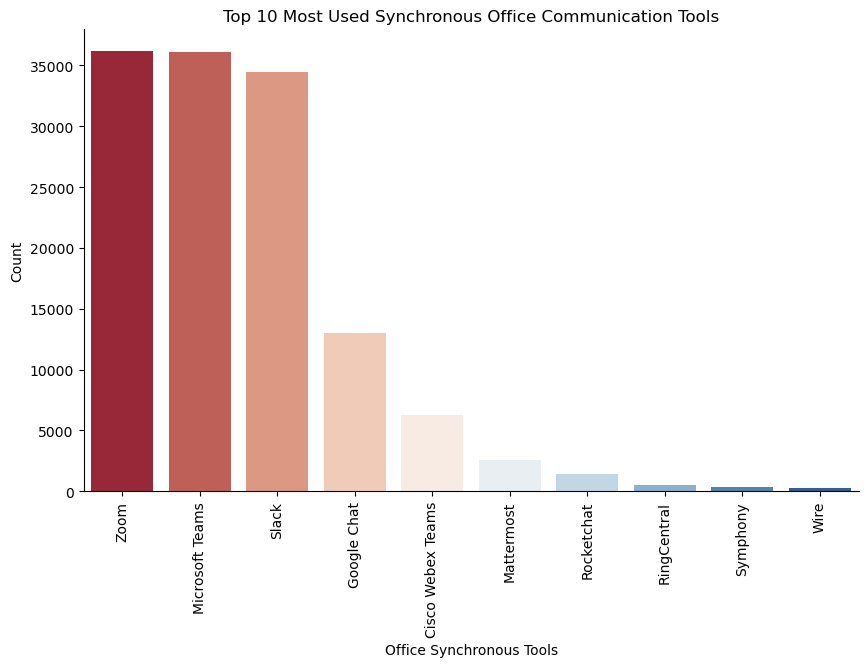

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(data = office_sy_count_df_previous.sort_values(by = 'Count', ascending = False).head(10), x = 'Office Synchronous Tools', y = 'Count', palette = 'RdBu')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Used Synchronous Office Communication Tools')
sns.despine()

In [90]:
trend_df['OfficeStackSyncWantToWorkWith'].value_counts().nlargest(10)

Slack                         10935
Microsoft Teams                8442
Slack;Zoom                     6765
Microsoft Teams;Slack          3037
Zoom                           2824
Microsoft Teams;Zoom           2178
Microsoft Teams;Slack;Zoom     1681
Google Chat                    1572
Google Chat;Slack              1559
Google Chat;Slack;Zoom         1051
Name: OfficeStackSyncWantToWorkWith, dtype: int64

In [91]:
# Split the values in the 'OfficeStackSyncHaveWorkedWith' column and count the languages
office_sy_counter = Counter()
for office_sy in trend_df['OfficeStackSyncWantToWorkWith']:
    if isinstance(office_sy, str) and office_sy != "NA":
        office_sy_counter.update(office_sy.split(';'))
# Create a DataFrame from the language counter
office_sy_count_df_future = pd.DataFrame.from_dict(office_sy_counter, orient='index', columns=['Count'])

In [92]:
office_sy_count_df_future = office_sy_count_df_future.reset_index()
office_sy_count_df_future = office_sy_count_df_future.rename(columns = {'index' : 'Office Synchronous Tools'})

In [93]:
office_sy_count_df_future.sort_values(by = 'Count', ascending = False).head(10)

,Office Synchronous Tools,Count
1,Slack,27844
0,Microsoft Teams,19140
2,Zoom,18042
4,Google Chat,7655
8,Mattermost,1972
7,Cisco Webex Teams,1944
3,Rocketchat,973
6,Wire,301
10,Symphony,268
5,RingCentral,215


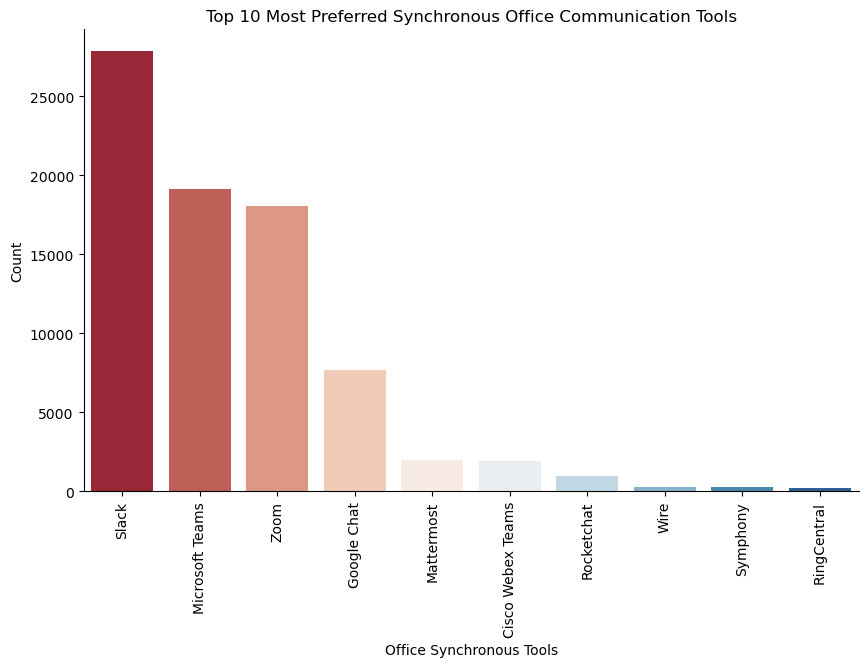

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(data = office_sy_count_df_future.sort_values(by = 'Count', ascending = False).head(10), x = 'Office Synchronous Tools', y = 'Count', palette = 'RdBu')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Preferred Synchronous Office Communication Tools')
sns.despine()

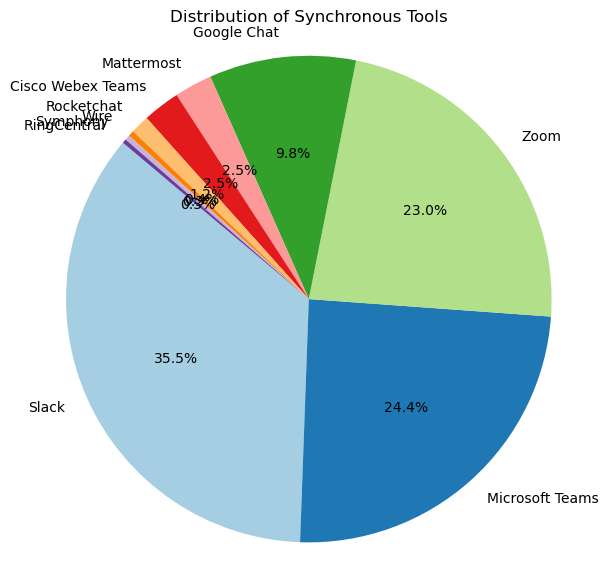

In [95]:
# Create a pie chart
data = office_sy_count_df_future.sort_values(by = 'Count', ascending = False).head(10)
plt.figure(figsize=(7, 7))
plt.pie(data['Count'], labels=data['Office Synchronous Tools'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Synchronous Tools')
plt.show()

### Miscellaneous Technology Tools

In [96]:
# Split the values in the 'MiscTechHaveWorkedWith' column and create a set of unique database names
unique_libs = set()
for libs in trend_df['MiscTechHaveWorkedWith']:
    if isinstance(libs, str) and libs != "NA":
        unique_libs.update(libs.split(';'))

unique_libs_list = list(unique_libs)
print(len(unique_libs_list))

23


In [97]:
trend_df['MiscTechHaveWorkedWith'].value_counts().nlargest(10)

.NET            8181
Spring          2991
React Native    1828
Flutter         1784
NumPy;Pandas    1672
Apache Kafka    1040
Electron         950
Qt               833
NumPy            826
.NET;Xamarin     824
Name: MiscTechHaveWorkedWith, dtype: int64

In [98]:
# Split the values in the 'MiscTechHaveWorkedWith' column and count the languages
libs_counter = Counter()
for libs in trend_df['MiscTechHaveWorkedWith']:
    if isinstance(libs, str) and libs != "NA":
        libs_counter.update(libs.split(';'))
# Create a DataFrame from the language counter
libs_count_df_previous = pd.DataFrame.from_dict(libs_counter, orient='index', columns=['Count'])

In [99]:
libs_count_df_previous = libs_count_df_previous.reset_index()
libs_count_df_previous = libs_count_df_previous.rename(columns = {'index' : 'Libs'})

In [100]:
libs_count_df_previous.sort_values(by = 'Count', ascending = False).head(10)

,Libs,Count
1,.NET,15850
3,NumPy,13144
0,Pandas,11506
13,Spring,7399
5,TensorFlow,5942
14,Flutter,5799
4,Scikit-learn,5776
12,React Native,5765
8,Apache Kafka,4748
11,Electron,4390


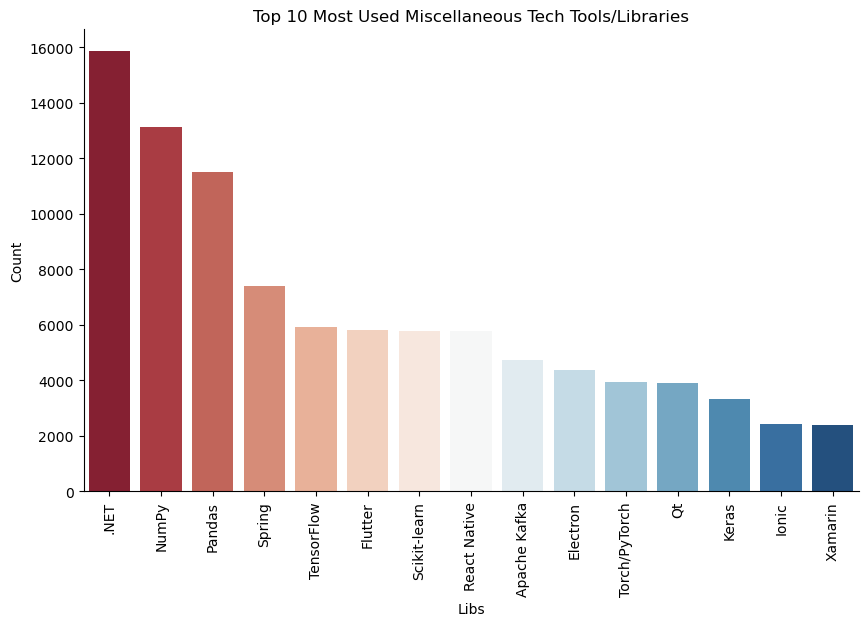

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(data = libs_count_df_previous.sort_values(by = 'Count', ascending = False).head(15), x = 'Libs', y = 'Count', palette = 'RdBu')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Used Miscellaneous Tech Tools/Libraries')
sns.despine()

In [102]:
trend_df['MiscTechWantToWorkWith'].value_counts().nlargest(10)

.NET                   5025
Flutter                1740
Spring                 1658
React Native           1231
Apache Kafka            926
NumPy;Pandas            782
.NET;Xamarin            653
Apache Kafka;Spring     615
Qt                      491
Electron                484
Name: MiscTechWantToWorkWith, dtype: int64

In [103]:
# Split the values in the 'MiscTechWantToWorkWith' column and count the languages
libs_counter = Counter()
for libs in trend_df['MiscTechWantToWorkWith']:
    if isinstance(libs, str) and libs != "NA":
        libs_counter.update(libs.split(';'))
# Create a DataFrame from the language counter
libs_count_df_future = pd.DataFrame.from_dict(libs_counter, orient='index', columns=['Count'])

In [104]:
libs_count_df_future = libs_count_df_future.reset_index()
libs_count_df_future = libs_count_df_future.rename(columns = {'index' : 'Libs'})

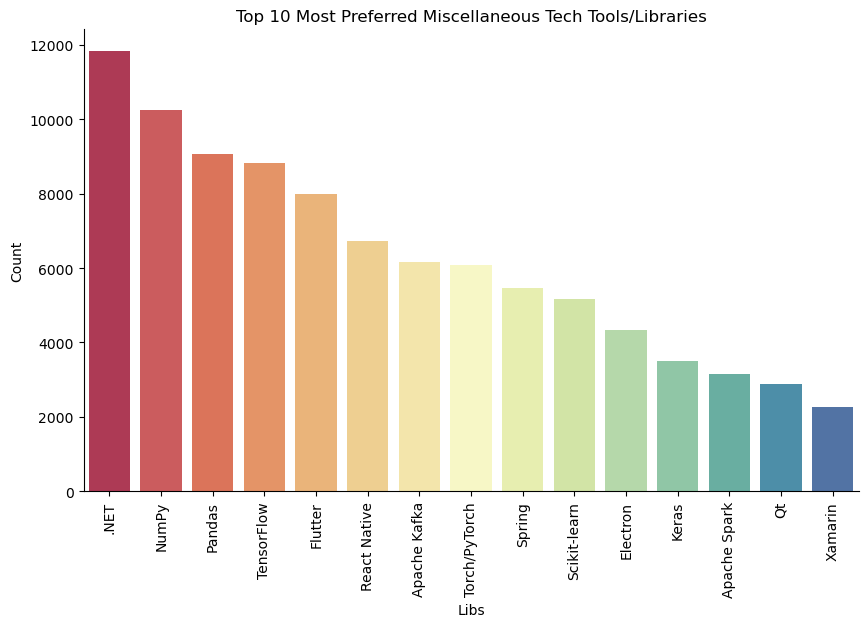

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(data = libs_count_df_future.sort_values(by = 'Count', ascending = False).head(15), x = 'Libs', y = 'Count', palette = 'Spectral')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Preferred Miscellaneous Tech Tools/Libraries')
sns.despine()

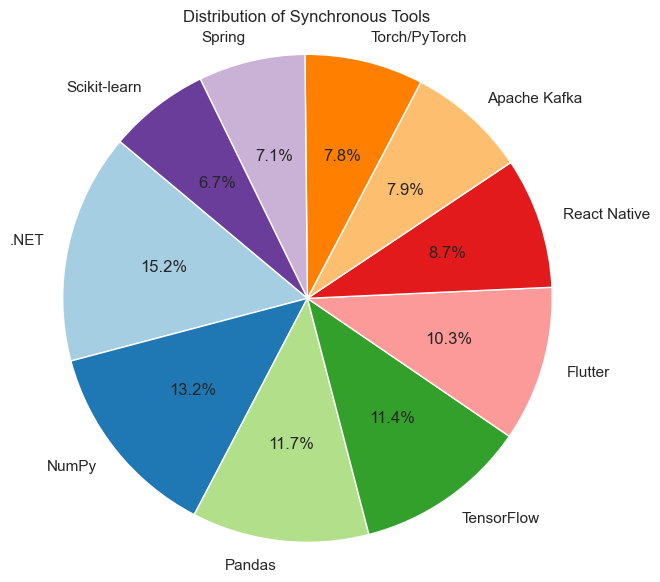

In [241]:
# Create a pie chart
data = libs_count_df_future.sort_values(by = 'Count', ascending = False).head(10)
plt.figure(figsize=(7, 7))
plt.pie(data['Count'], labels=data['Libs'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Synchronous Tools')
plt.show()

## Developer Demographics 

### Data Wrangling (clean, sort, filter processes)
##### The survey provides insights into the demographics of developers, such as age, gender, education, and geographic location etc.

In [107]:
demographics_df = survey_df[['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'Country', 
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'Age', 'Gender', 
       'Trans', 'Sexuality', 'Ethnicity', 'Accessibility', 'MentalHealth']]

##### We first clean the data appropriately for segmentation purposes and plug in the labels properly for python to understand the data set

In [108]:
# Standardize text
demographics_df['CodingActivities'] = demographics_df['CodingActivities'].str.replace("donâ€™t", "don't")


#### Profession aka MainBranch

In [109]:
# Rename Main Branch to profession and rename labels
demographics_df = demographics_df.rename(columns = {'MainBranch' : 'Profession'})
demographics_df['Profession'].unique()

array(['None of these', 'I am a developer by profession',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I code primarily as a hobby', 'I am learning to code',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [110]:
# Define mapping for replacements
replacement_map_main = {
    'I am a developer by profession': 'Developer',
    'I am not primarily a developer, but I write code sometimes as part of my work': 'Non-developer coder',
    'I code primarily as a hobby': 'Hobbyist coder',
    'I am learning to code' : 'Coding learner',
    'I used to be a developer by profession, but no longer am' : 'Ex-developer'
}

# Replace values in the 'Main Branch' column using the map
demographics_df['Profession'] = demographics_df['Profession'].replace(replacement_map_main)

#### Employment

In [111]:
# Split the values in the 'Employment' column
unique_emp = set()
for emp in demographics_df['Employment']:
    if isinstance(emp, str) and emp != "NA":
        unique_emp.update(emp.split(';'))

unique_emp_list = list(unique_emp)

In [112]:
unique_emp_list

['I prefer not to say',
 'Not employed, but looking for work',
 'Student, part-time',
 'Retired',
 'Student, full-time',
 'Employed, full-time',
 'Not employed, and not looking for work',
 'Employed, part-time',
 'Independent contractor, freelancer, or self-employed']

In [113]:
print(len(unique_emp_list))

9


In [114]:
#im not considering the retired person here
#Refactoring the employment
def refactor_emp(df):
    
    conditions_emp = [(df['Employment'] == 'Employed, full-time'),
                    (df['Employment'] == 'Independent contractor, freelancer, or self-employed'),
                    (df['Employment'] == 'Not employed, but looking for work'),
                    (df['Employment'] == 'Employed, part-time')]
    
    choices_emp = ['Full-time', 'Self-employed', 'Not employed', 'Part-time']
    
    df['Employment'] = np.select(conditions_emp, choices_emp, default=np.nan)
                       
    return df

demographics_df = refactor_emp(demographics_df)

#### Remote Work

In [115]:
demographics_df['RemoteWork'].unique()

array([nan, 'Fully remote', 'Hybrid (some remote, some in-person)',
       'Full in-person'], dtype=object)

In [116]:
# Define mapping for replacements
replacement_map_remote_work = {
    'Fully remote': 'Remote',
    'Hybrid (some remote, some in-person)': 'Hybrid',
    'Full in-person': 'in-person'
}
# Replace values in the 'RemoteWork' column using the map
demographics_df['RemoteWork'] = demographics_df['RemoteWork'].replace(replacement_map_remote_work)

### Coding Activities

In [117]:
# Split the values in the 'Employment' column
unique_act = set()
for act in demographics_df['CodingActivities']:
    if isinstance(act, str) and act != "NA":
        unique_act.update(act.split(';'))

unique_act_list = list(unique_act)

In [118]:
unique_act_list

['Contribute to open-source projects',
 'Other (please specify):',
 'Freelance/contract work',
 'School or academic work',
 'Hobby',
 'I don’t code outside of work',
 'Bootstrapping a business']

In [119]:
demographics_df.columns

Index(['ResponseId', 'Profession', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'Country', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro',
       'DevType', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
       'Accessibility', 'MentalHealth'],
      dtype='object')

### Education Level

In [120]:
# Split the values in the 'Employment' column
unique_edu = set()
for edu in demographics_df['EdLevel']:
    if isinstance(edu, str) and edu != "NA":
        unique_edu.update(edu.split(';'))

unique_edu_list = list(unique_edu)

In [121]:
unique_edu_list

['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
 'Primary/elementary school',
 'Something else',
 'Professional degree (JD, MD, etc.)',
 'Some college/university study without earning a degree',
 'Associate degree (A.A., A.S., etc.)',
 'Other doctoral degree (Ph.D., Ed.D., etc.)']

In [122]:
#  Refactoring EdLevel
def remap_edu(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
                     (df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
                     (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                     (df['EdLevel'] == 'Associate degree (A.A., A.S., etc.)'),
                     (df['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
                     (df['EdLevel'] == 'Some college/university study without earning a degree') 
                     | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                     | (df['EdLevel'] == 'Primary/elementary school')
                     | (df['EdLevel'] == 'Something else')]

    choices_ed = ['Bachelors', 'Masters', 'Professional', 'Associate', 'Doctorate', 'No Degree']

    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    
    return df

In [123]:
# applying function to subsets
demographics_df = remap_edu(demographics_df)

In [124]:
demographics_df['EdLevel'].replace('nan', 'Bachelors', inplace=True)

### Developer Type

In [125]:
demographics_df['DevType'].isna().sum()

11966

In [126]:
demographics_df['DevType'].fillna(method='ffill', inplace=True)

In [127]:
demographics_df['DevType'].value_counts().nlargest()

Developer, full-stack                                             8484
Developer, back-end                                               6344
Developer, front-end                                              2856
Developer, front-end;Developer, full-stack;Developer, back-end    2145
Developer, full-stack;Developer, back-end                         1829
Name: DevType, dtype: int64

In [128]:
# Split the values in the 'Developer Type' column
unique_dev = set()
for dev in demographics_df['DevType']:
    if isinstance(dev, str) and dev != "NA":
        unique_dev.update(dev.split(';'))

unique_dev_list = list(unique_dev)

In [129]:
unique_dev_list

['Blockchain',
 'Developer, full-stack',
 'Developer, back-end',
 'Engineer, site reliability',
 'Product manager',
 'Designer',
 'Senior Executive (C-Suite, VP, etc.)',
 'System administrator',
 'DevOps specialist',
 'Other (please specify):',
 'Project manager',
 'Security professional',
 'Engineering manager',
 'Cloud infrastructure engineer',
 'Scientist',
 'Database administrator',
 'Data scientist or machine learning specialist',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Engineer, data',
 'Academic researcher',
 'Educator',
 'Marketing or sales professional',
 'Developer, QA or test',
 'Data or business analyst',
 'Developer, desktop or enterprise applications',
 'Developer, mobile',
 'Student',
 'Developer, game or graphics']

In [130]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [131]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            28701
Developer, back-end                              26595
Developer, front-end                             15915
Developer, desktop or enterprise applications     9546
Developer, mobile                                 7634
DevOps specialist                                 6170
Student                                           5595
Cloud infrastructure engineer                     5283
Database administrator                            4934
System administrator                              4908
Developer, embedded applications or devices       3923
Project manager                                   3897
Designer                                          3764
Engineer, data                                    3600
Engineering manager                               3574
Data scientist or machine learning specialist     3424
Data or business analyst                          3201
Developer, QA or test                             3096
Academic r

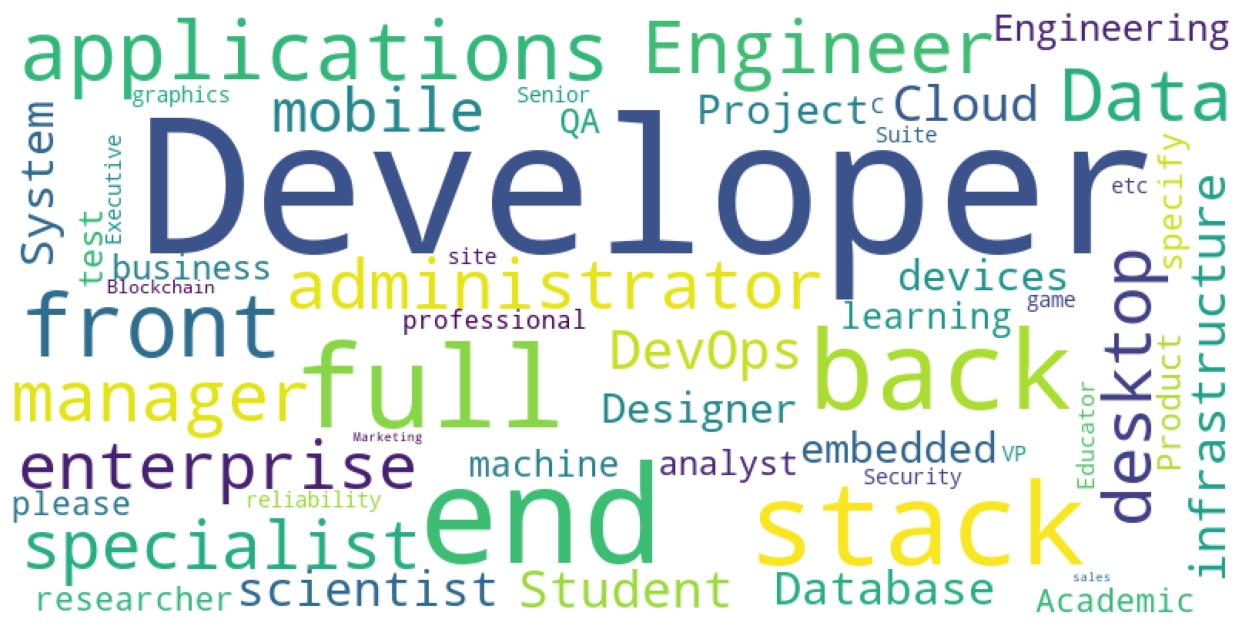

In [132]:
from wordcloud import WordCloud
words = ' '.join((job for job in survey_df.DevType.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

### Country

In [133]:
demographics_df['Country'].nunique()

180

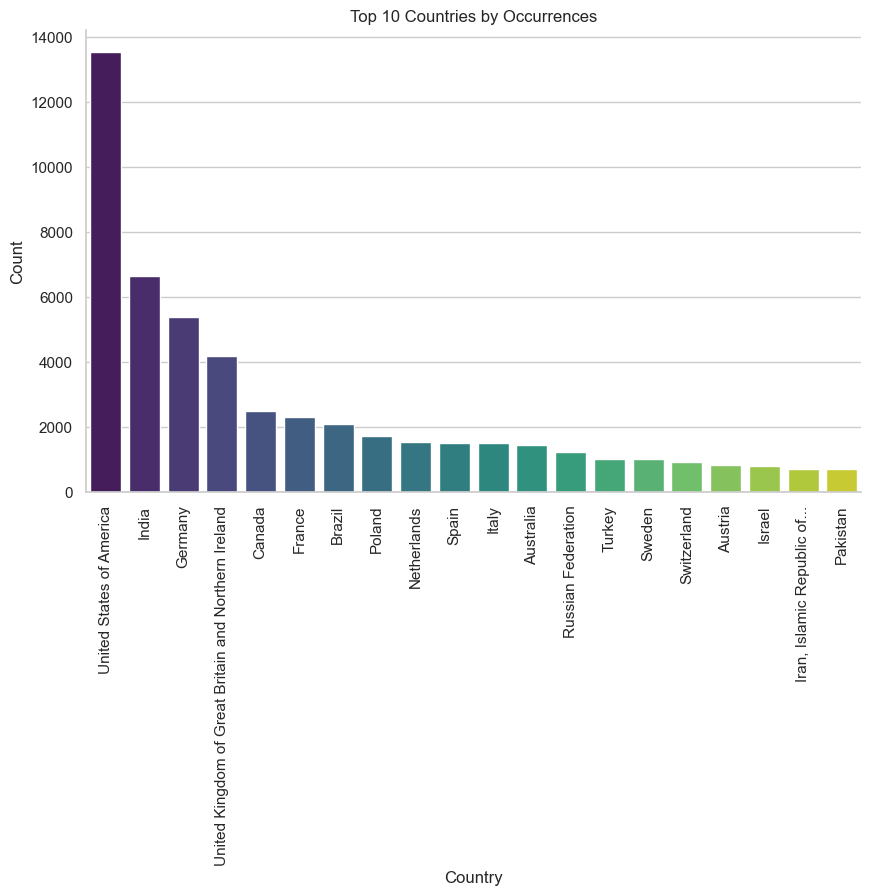

In [134]:
# Get the top 10 countries by occurrence
top_countries = demographics_df['Country'].value_counts().nlargest(20).index
demographics_df_top_countries = demographics_df[demographics_df['Country'].isin(top_countries)]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(data=demographics_df_top_countries, x='Country', order=top_countries, palette='viridis')
plt.title('Top 10 Countries by Occurrences')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.despine()
plt.show()

In [135]:
import folium 
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [136]:
country_counts = survey_df.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df

,Country,Count
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom of Great Britain and Northern I...,4190
4,Canada,2490
...,...,...
175,Monaco,1
176,Djibouti,1
177,Seychelles,1
178,Solomon Islands,1


In [137]:
country_counts_df.at[0, 'Country'] = 'United States of America'
country_counts_df.at[12, 'Country'] = 'Russia'

In [138]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

m

### Gender

In [139]:
demographics_df['Gender'].unique()

array([nan, 'Man', 'Or, in your own words:', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Prefer not to say',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Woman', 'Man;Or, in your own words:',
       'Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:;Woman',
       'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:;Woman'], dtype=object)

In [140]:
demographics_df['Gender'].nunique()

16

In [141]:
# Split the values in the 'Developer Type' column
unique_gender = set()
for gender in demographics_df['Gender']:
    if isinstance(gender, str) and gender != "NA":
        unique_gender.update(gender.split(';'))

unique_gender_list = list(unique_gender)

In [142]:
unique_gender_list

['Man',
 'Non-binary, genderqueer, or gender non-conforming',
 'Woman',
 'Or, in your own words:',
 'Prefer not to say']

In [143]:
#lets refactor Gender values to Male, female and Non binary only
#For the purpose of our data analysis we are considering three gender category.

def remap_gender(df):
    '''function to change gender category to Male, Female, Non binary'''
    conditions = [(df['Gender'] == 'Man') | (df['Gender'] == 'Man;Non-binary, genderqueer, or gender non-conforming'),
                  (df['Gender'] == 'Woman') | (df['Gender'] == 'Woman;Non-binary, genderqueer, or gender non-conforming'),
                  (df['Gender'] == 'Non-binary, genderqueer, or gender non-conforming') 
                  | (df['Gender'] == 'Woman;Man') 
                  | (df['Gender'] == 'Woman;Man;Non-binary, genderqueer, or gender non-conforming')]

    values = ['Man', 'Woman', 'Non-binary']

    df['Gender'] = np.select(conditions, values, default = np.NaN)
    
    return df
            

In [144]:
demographics_df = remap_gender(demographics_df)
demographics_df['Gender'].replace('nan', 'Non-binary', inplace =True)

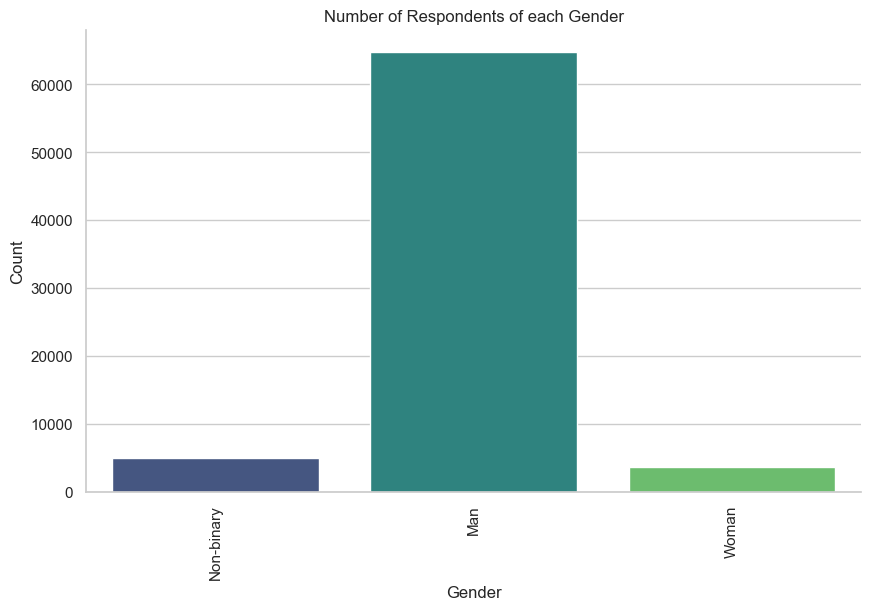

In [145]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(data=demographics_df, x='Gender', palette='viridis')
plt.title('Number of Respondents of each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.despine()
plt.show()

### Age of the Respondents

In [146]:
demographics_df['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [147]:
demographics_df['Age'].nunique()

8

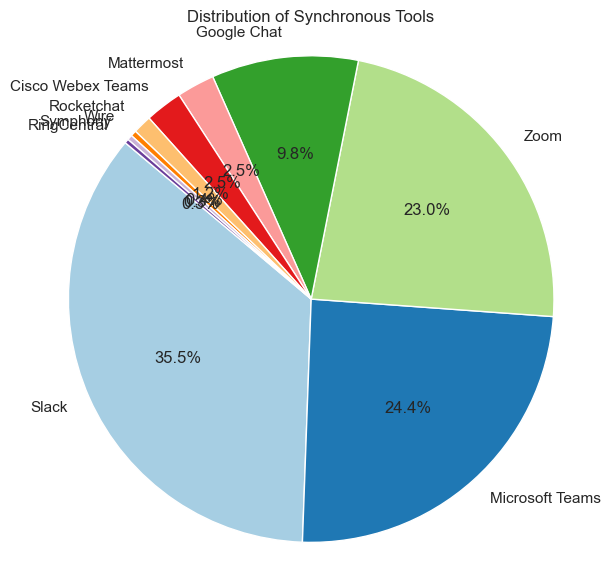

In [148]:
# Create a pie chart
data = office_sy_count_df_future.sort_values(by = 'Count', ascending = False).head(10)
plt.figure(figsize=(7, 7))
plt.pie(data['Count'], labels=data['Office Synchronous Tools'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Synchronous Tools')
plt.show()

In [149]:
demographics_df['Age'].value_counts().nlargest(8)

25-34 years old       28112
18-24 years old       16646
35-44 years old       13988
45-54 years old        5281
Under 18 years old     3866
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Name: Age, dtype: int64

In [150]:
# Split the values in the demographics_df['Age'] column and count the languages
age_counter = Counter()
for age in demographics_df['Age']:
    if isinstance(age, str) and age != "NA":
        age_counter.update(age.split(';'))
# Create a DataFrame from the language counter
age_count_df = pd.DataFrame.from_dict(age_counter, orient='index', columns=['Count'])

In [151]:
age_count_df = age_count_df.reset_index()
age_count_df = age_count_df.rename(columns = {'index' : 'Age'})

In [152]:
age_count_df = age_count_df.sort_values(by = 'Count', ascending = False).head(10)

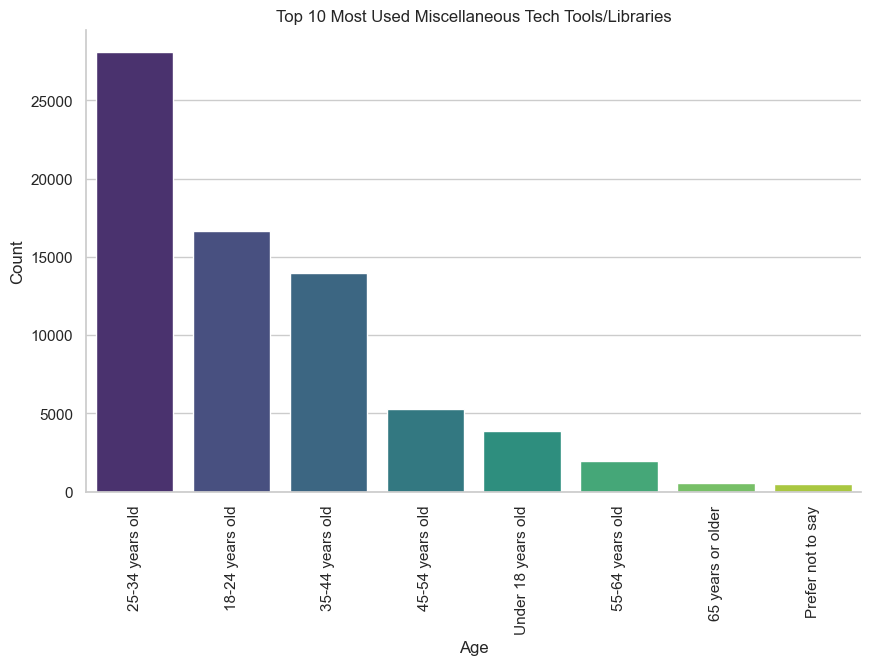

In [153]:
plt.figure(figsize=(10, 6))
sns.barplot(data = age_count_df, x = 'Age', y = 'Count', palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Top 10 Most Used Miscellaneous Tech Tools/Libraries')
sns.despine()

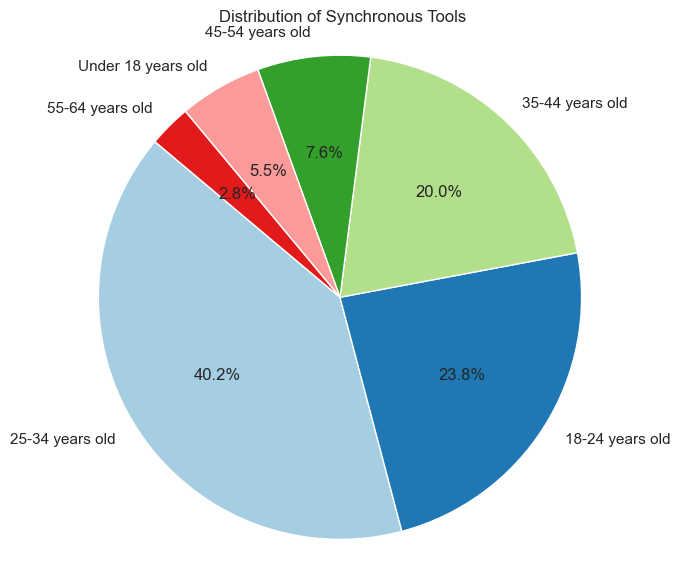

In [154]:
# Create a pie chart
age_count_df = age_count_df.head(6)
plt.figure(figsize=(7, 7))
plt.pie(age_count_df['Count'], labels=age_count_df['Age'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Synchronous Tools')
plt.show()

In [155]:
demographics_df.columns

Index(['ResponseId', 'Profession', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'Country', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro',
       'DevType', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
       'Accessibility', 'MentalHealth'],
      dtype='object')

### Self Exploring Questions

##### In this section we will ask two main questions that we will answer with foundational statistical techniques; Which countries often pay developers the higher salaries? and the second being; does certain developer roles correlate with higher salaries?

##### To answer this question we will need a dataset that contains the currency exchange rates with respect to the US dollars (USD) for the year 2022!

In [156]:
currency = pd.read_csv(r"C:\Users\danis\Desktop\University of Toronto\Summer 2023\Stack Overflow Developer Survey 2022\National Currencies Per US Dollar.csv", encoding="cp1252")

##### Cleaning the currency conversion data set

In [157]:
currency.head()

,Country Name,Currency Code,Currency Name,Date,Exchange Rate,GDP(nominal) Per Capita,GDP,Population
0,Afghanistan,AFN,Afghanistan Afghani,3/17/2022,0.011300,NaN,NaN,NaN
1,Albania,ALL,Albanian Lek,3/17/2022,0.008991,NaN,NaN,NaN
2,Algeria,DZD,Algerian Dinar,3/17/2022,0.007024,NaN,NaN,NaN
3,Andorra,EUR,Euro,3/17/2022,1.109350,NaN,NaN,NaN
4,Angola,AOA,Angolan Kwanza,3/17/2022,0.002195,NaN,NaN,NaN


In [158]:
currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Name             2795 non-null   object 
 1   Currency Code            2795 non-null   object 
 2   Currency Name            2795 non-null   object 
 3   Date                     2795 non-null   object 
 4   Exchange Rate            2787 non-null   float64
 5   GDP(nominal) Per Capita  2165 non-null   float64
 6   GDP                      2167 non-null   float64
 7   Population               2235 non-null   float64
dtypes: float64(4), object(4)
memory usage: 174.8+ KB


In [159]:
currency.isna().sum()

Country Name                 0
Currency Code                0
Currency Name                0
Date                         0
Exchange Rate                8
GDP(nominal) Per Capita    630
GDP                        628
Population                 560
dtype: int64

##### Keeping only the exchange rate observations of the year 2022

In [160]:
currency['Date'].unique()

array(['3/17/2022', '12/2/2021', '12/4/2020', '12/2/2019', '12/4/2018',
       '12/4/2017', '12/2/2016', '12/4/2015', '12/4/2014', '12/2/2013',
       '12/4/2012', '12/2/2011', '12/1/2010'], dtype=object)

In [161]:
currency.columns

Index(['Country Name', 'Currency Code', 'Currency Name', 'Date',
       'Exchange Rate', 'GDP(nominal) Per Capita', 'GDP', 'Population'],
      dtype='object')

In [162]:
currency = currency[currency['Date'] == '3/17/2022']
currency = currency.drop(columns = ['Country Name', 'Date', 'GDP(nominal) Per Capita', 'GDP', 'Population'])

In [163]:
currency = currency.drop_duplicates(subset=["Currency Code"])
null_values = currency[currency["Exchange Rate"].isna()]["Currency Code"].index
currency.drop(null_values, inplace=True)
new_columns = {"Currency Code": ["CZK", "HKD"], "Currency Name": ["Czech Republic Koruna", "Hong Kong Dollar"], "Exchange Rate": [0.0449, 0.1279]}

new_df = pd.DataFrame(new_columns)
currency = pd.concat([currency, new_df], ignore_index=True)

##### Now we clean the survey data to make it ready so it can be easily be merged with the currency data

In [164]:
salary_df = survey_df[['DevType', 'Country', 'Currency', 'CompTotal', 'CompFreq']]
salary_df = salary_df.dropna(subset=['DevType', 'Country', 'Currency'])

In [165]:
def extract_currency(value):
    match = re.match(r'([A-Z]{3})\s+(.+)', value)
    if match:
        return match.groups()
    else:
        return [value, None]

# Apply the extract_currency function to the 'Currency' column
salary_df[['CurrencyCode', 'CurrencyName']] = salary_df['Currency'].apply(extract_currency).apply(pd.Series)

In [166]:
salary_df = salary_df.drop(columns = 'Currency')

##### Renaming the columns for it to merge with the currency data frame

In [167]:
salary_df = salary_df.rename(columns = {'CurrencyCode' : 'Currency Code', 'CurrencyName' : 'Currency Name'})

In [168]:
merged_df = pd.merge(salary_df, currency, on = ['Currency Code'])
merged_df = merged_df.drop(columns = ['Currency Name_x', 'Currency Name_y'])

In [169]:
def conversion(row):
    comp_freq = row['CompFreq']
    comp_total = row['CompTotal']
    exchange_rate = row['Exchange Rate']
    
    if comp_freq == "Weekly":
        return comp_total * 52 * exchange_rate
    elif comp_freq == "Monthly":
        return comp_total * 12 * exchange_rate
    elif comp_freq == "Yearly":
        return comp_total * exchange_rate
    else:
        return None

merged_df['CompinDollar'] = merged_df.apply(conversion, axis=1)

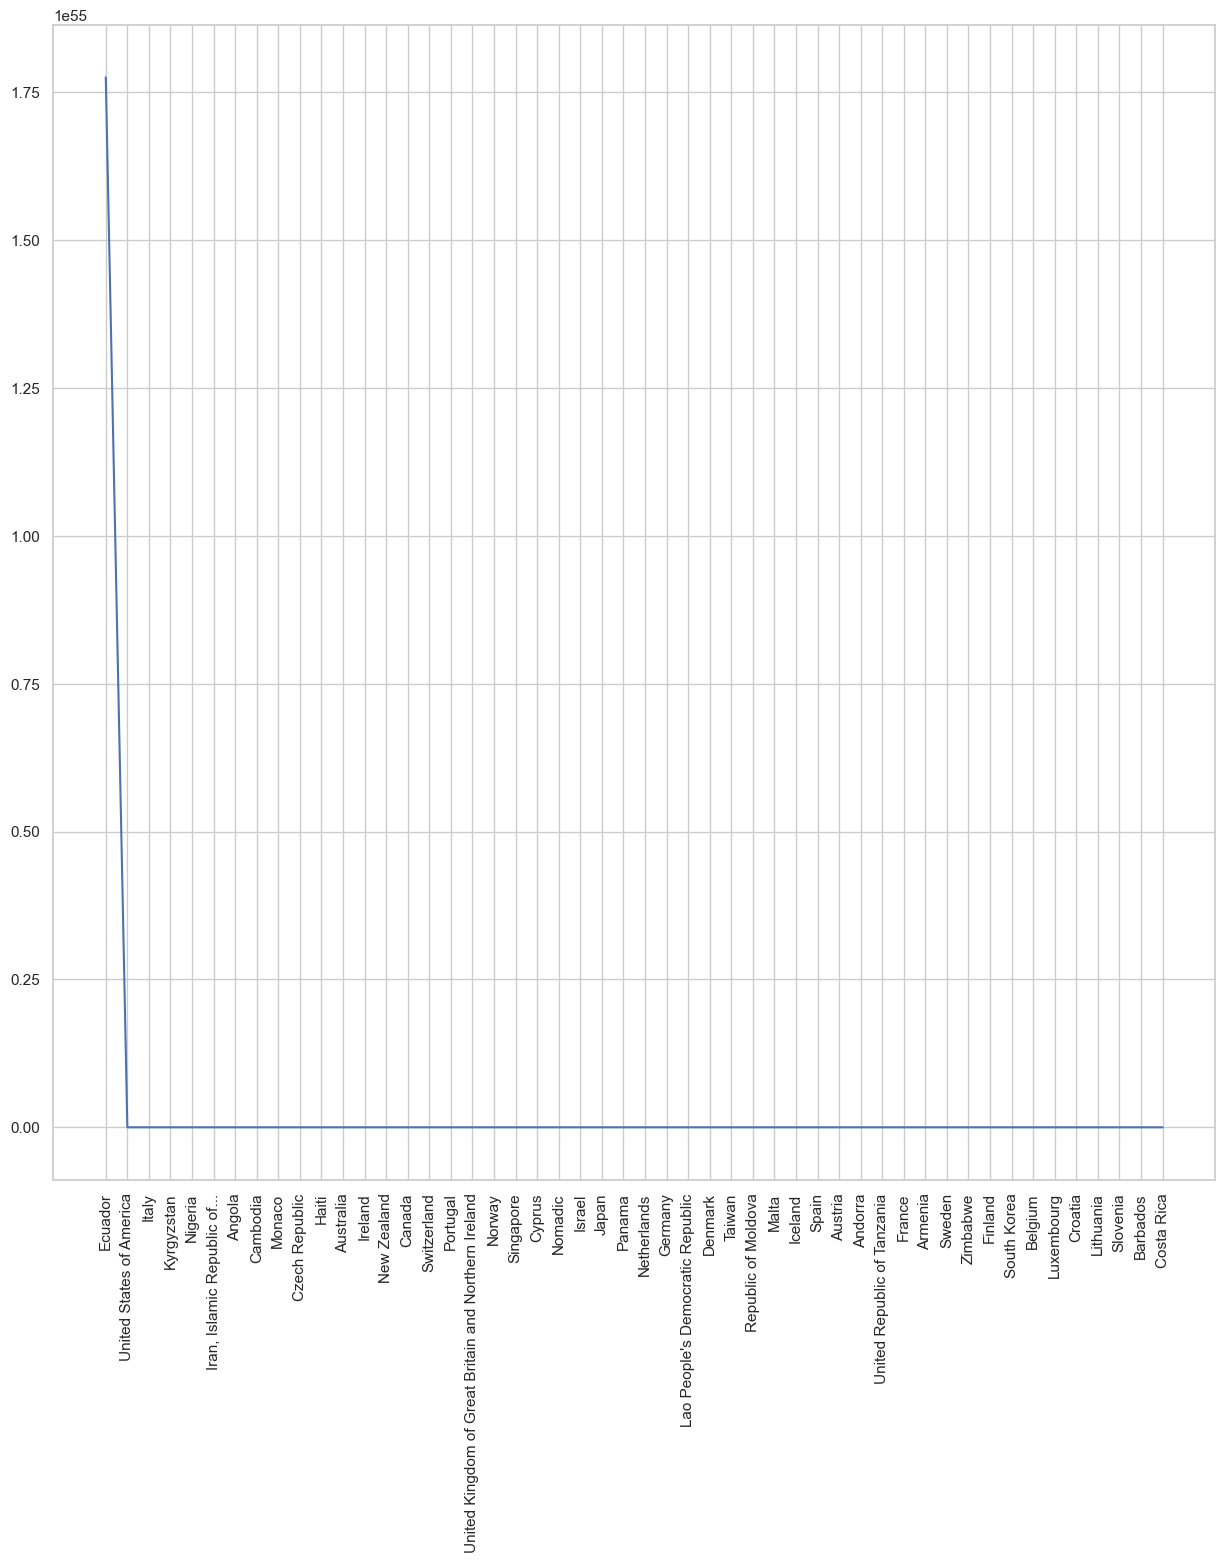

In [170]:
plt.figure(figsize=(15, 15))
plt.plot(merged_df[["Country", 'CompinDollar']].groupby("Country").agg(np.mean).sort_values(by='CompinDollar', ascending=False)[:50])
plt.xticks(rotation=90)
plt.show()

merged_df = merged_df[merged_df['CompinDollar'] < 1000000.000]

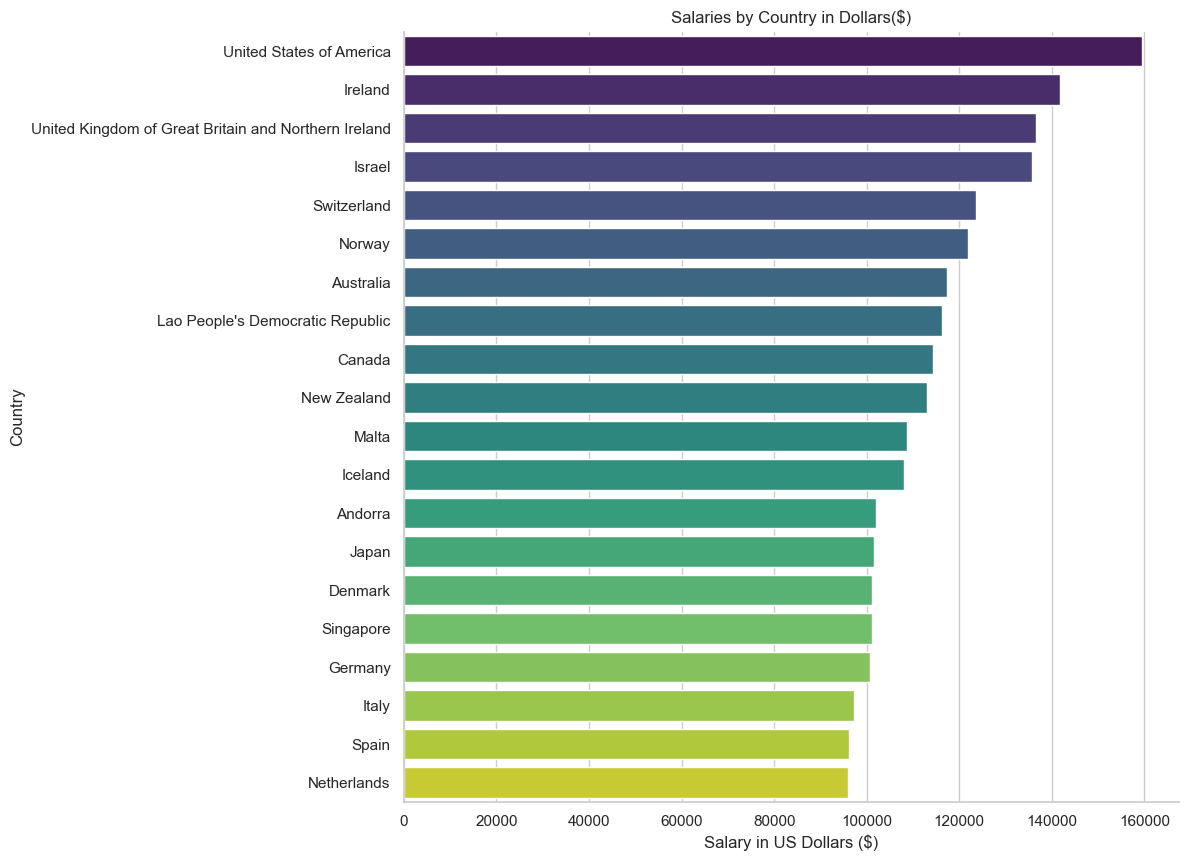

In [172]:
country_df = merged_df[["Country", 'CompinDollar']].groupby("Country").agg(np.mean).sort_values('CompinDollar', ascending=False)
plt.figure(figsize=(10, 10))
plt.title("Salaries by Country in Dollars($)")
sns.barplot(y=country_df.index[:20], x=country_df['CompinDollar'][:20], palette="viridis")
plt.xlabel('Salary in US Dollars ($)')
sns.despine()
plt.show()

### Salary by Developer

In [196]:
merged_df_1 = merged_df[['DevType', 'Country','CompinDollar']]

In [197]:
# Extract the first developer type
merged_df_1['FirstDevType'] = merged_df_1['DevType'].str.split(';').str[0]

# Convert CompinDollar to numerical values
merged_df_1['CompinDollar'] = merged_df_1['CompinDollar'].astype(float)

# Group by developer type and calculate mean salary
mean_salary_by_devtype = merged_df_1.groupby('FirstDevType')['CompinDollar'].mean()

In [198]:
mean_salary_by_devtype = pd.DataFrame(mean_salary_by_devtype).reset_index()

In [199]:
mean_salary_by_devtype = mean_salary_by_devtype.sort_values(by = 'CompinDollar', ascending = False)
mean_salary_by_devtype = mean_salary_by_devtype[mean_salary_by_devtype['FirstDevType'] != 'Other (please specify):']

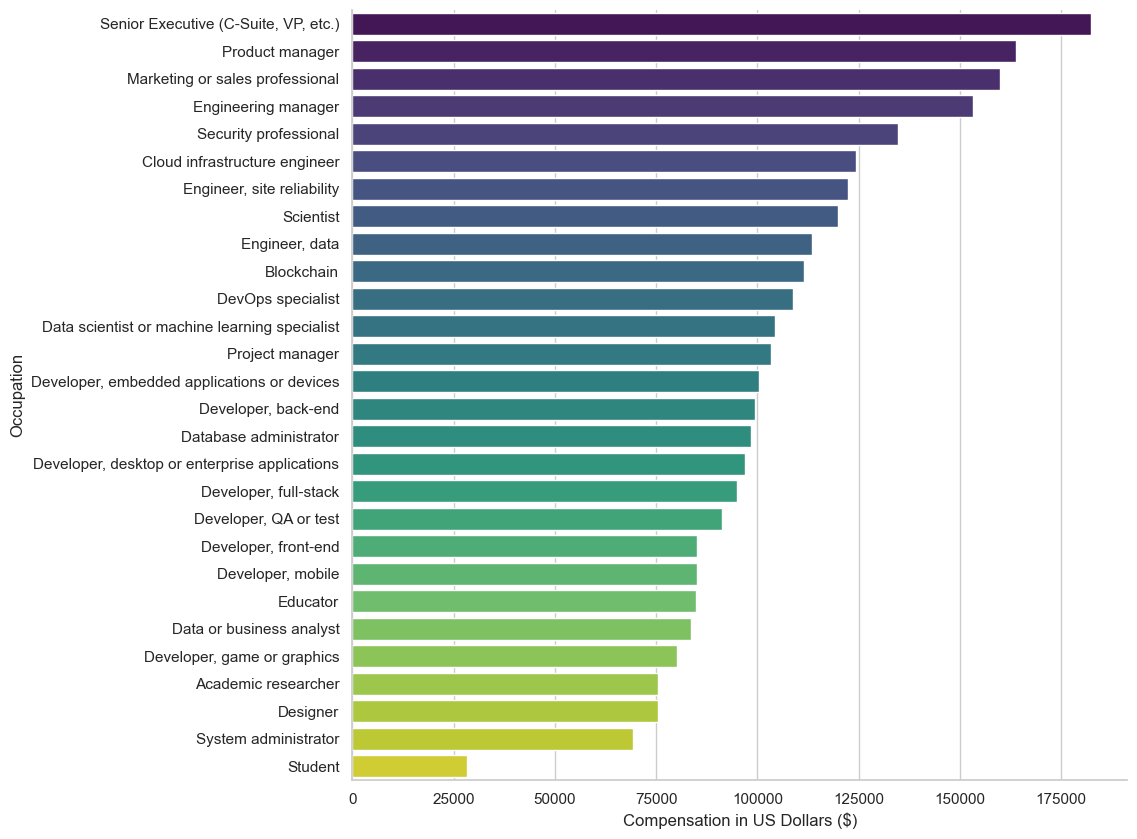

In [200]:
plt.figure(figsize=(10, 10))
sns.barplot(y = mean_salary_by_devtype['FirstDevType'], x = mean_salary_by_devtype['CompinDollar'], palette = 'viridis')
plt.xlabel('Compensation in US Dollars ($)')
plt.ylabel('Occupation')
sns.despine()

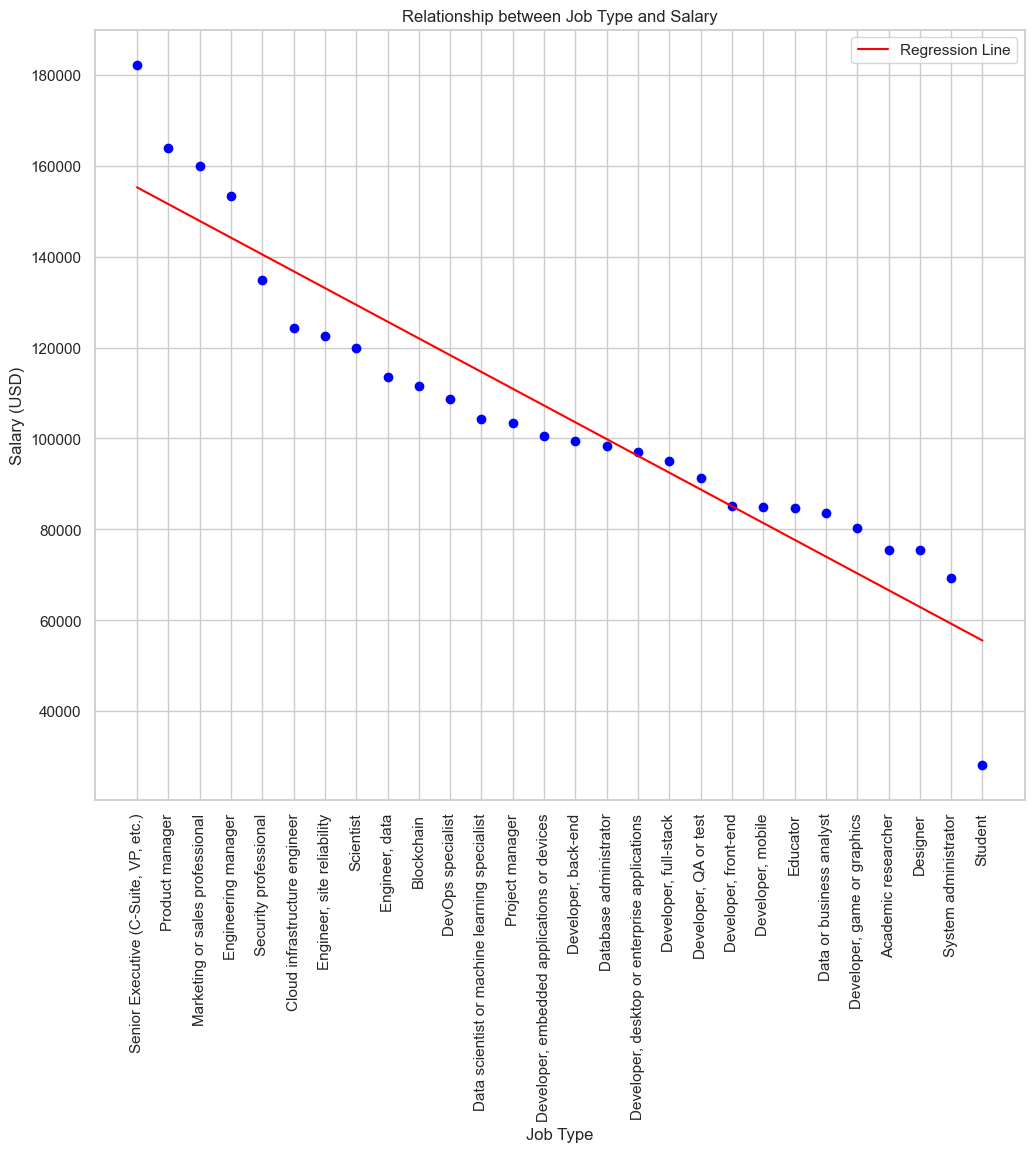

In [201]:
import numpy as np
from scipy import stats

plt.figure(figsize=(12, 10))
plt.scatter(mean_salary_by_devtype['FirstDevType'], mean_salary_by_devtype['CompinDollar'], color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Job Type')
plt.ylabel('Salary (USD)')
plt.title('Relationship between Job Type and Salary')

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(mean_salary_by_devtype['CompinDollar'])), mean_salary_by_devtype['CompinDollar'])
regression_line = [slope * x + intercept for x in range(len(mean_salary_by_devtype['CompinDollar']))]

# Plot the regression line
plt.plot(mean_salary_by_devtype['FirstDevType'], regression_line, color='red', label='Regression Line')
plt.legend()

# Show the plot
plt.show()

In [211]:
merged_df_tree = merged_df.copy()

In [212]:
merged_df_tree.columns

Index(['DevType', 'Country', 'CompTotal', 'CompFreq', 'Currency Code',
       'Exchange Rate', 'CompinDollar'],
      dtype='object')

In [213]:
merged_df_tree = merged_df_tree[['DevType', 'Country', 'CompinDollar']]

In [214]:
merged_df_tree['DevType'] = merged_df_tree['DevType'].apply(lambda x: x.split(';')[0])

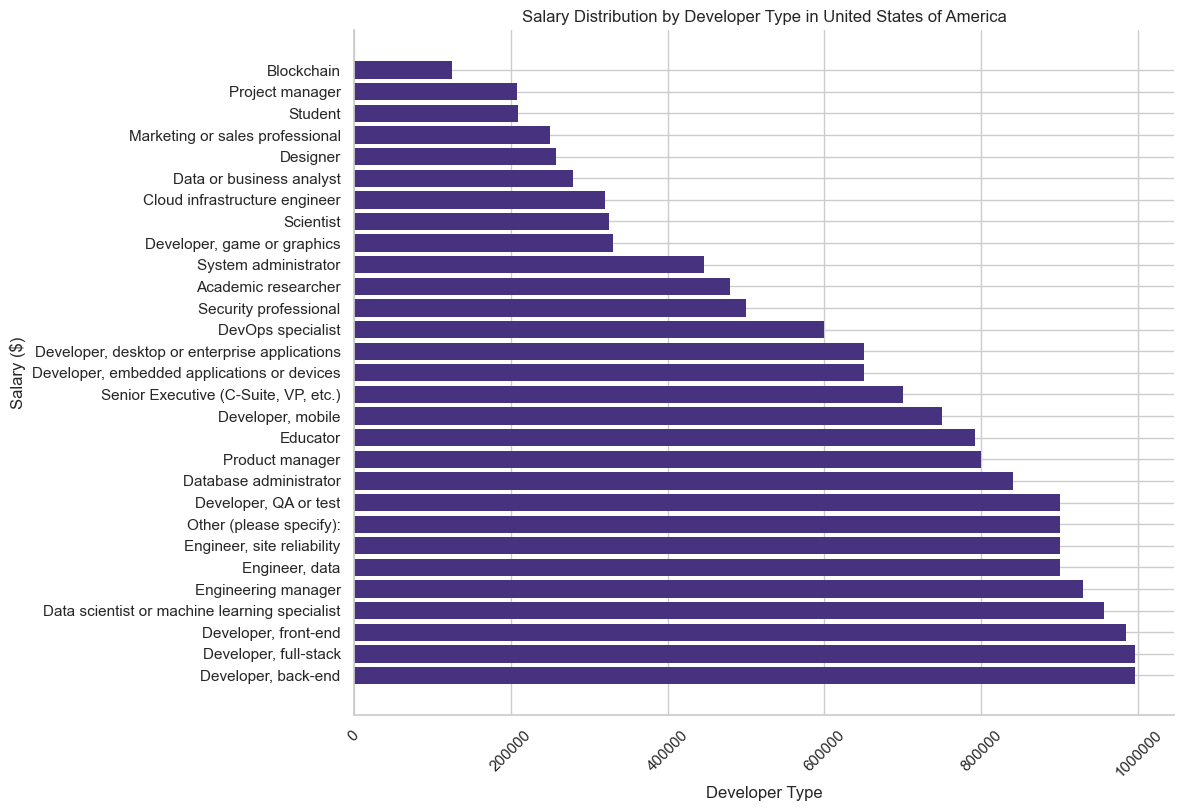

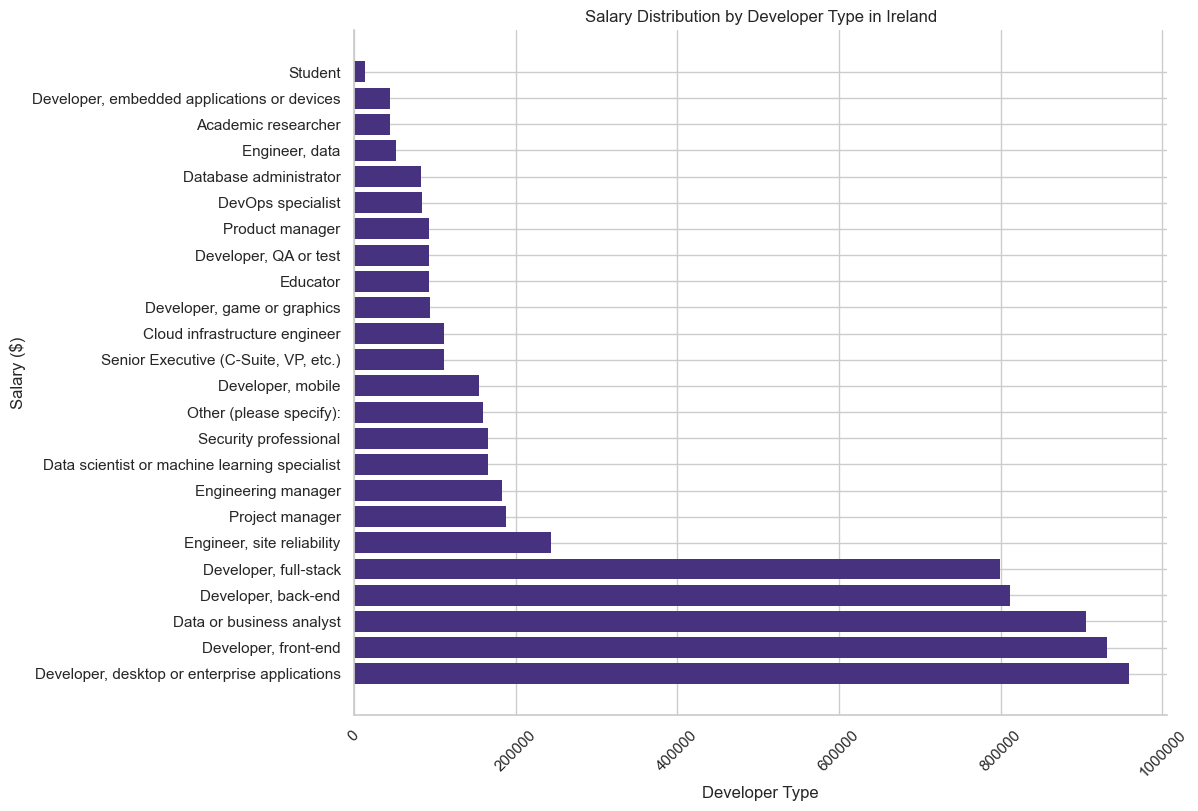

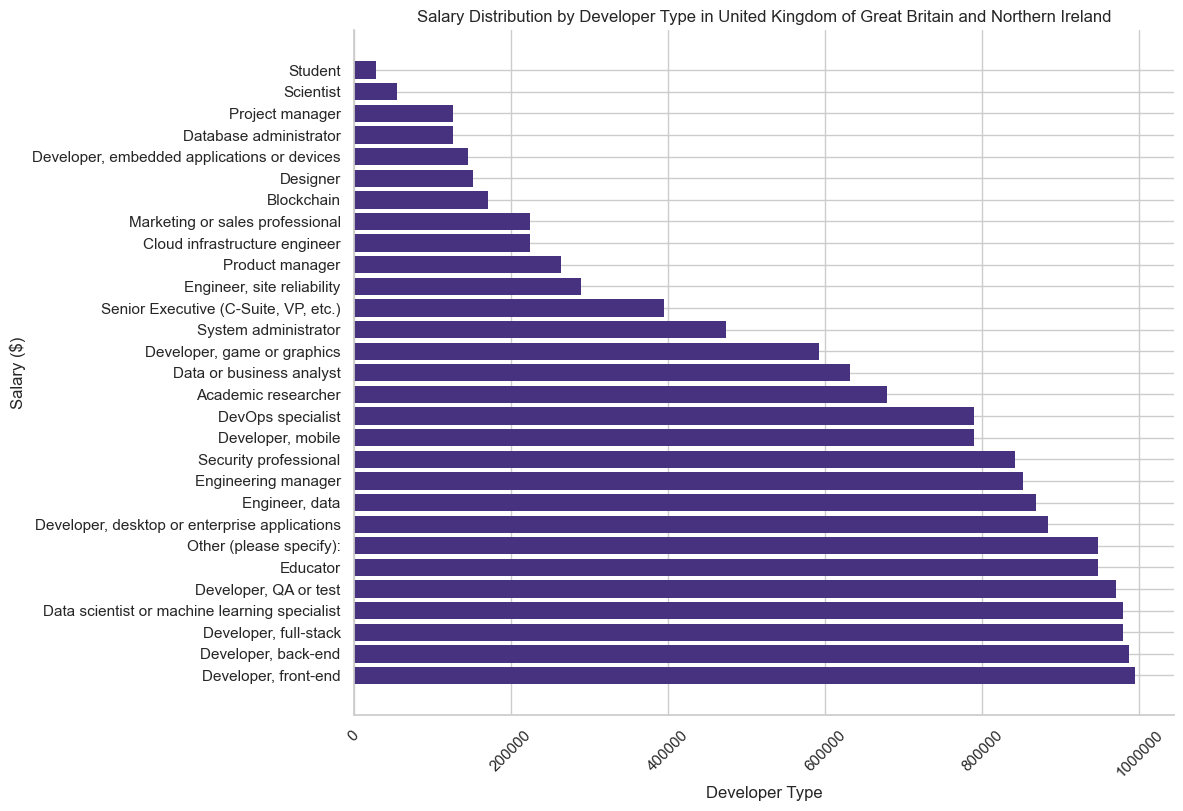

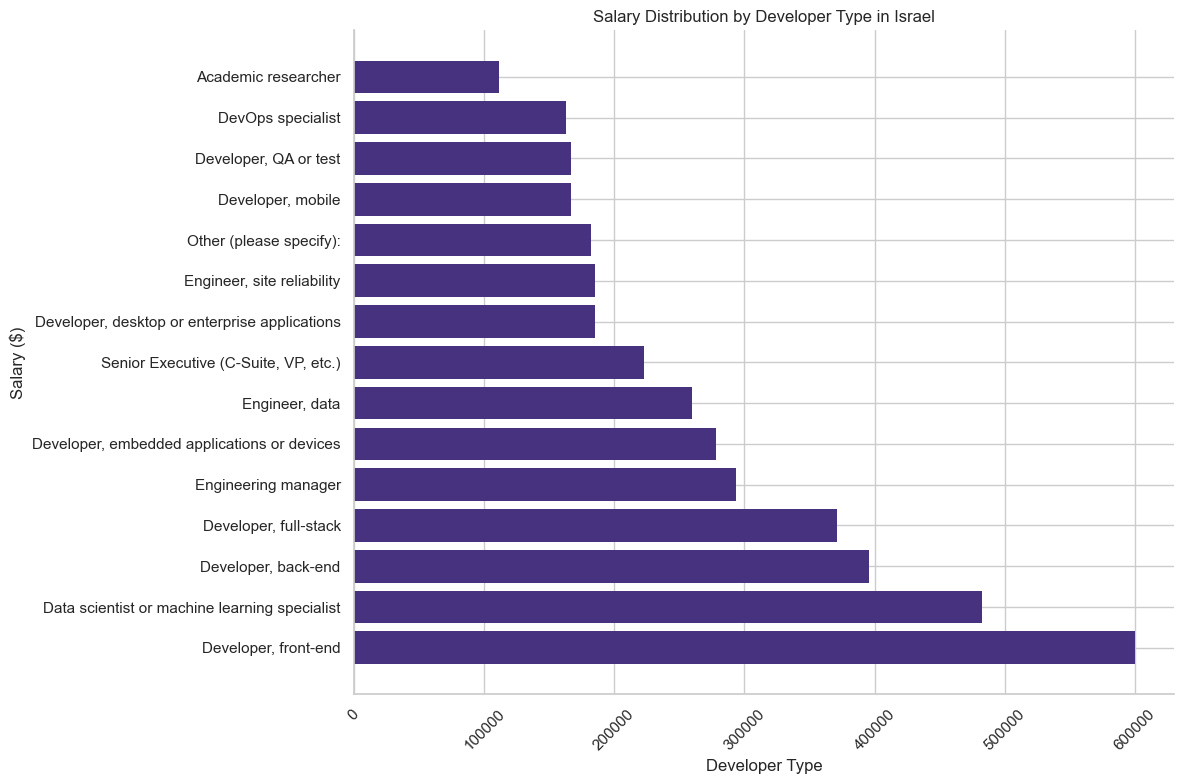

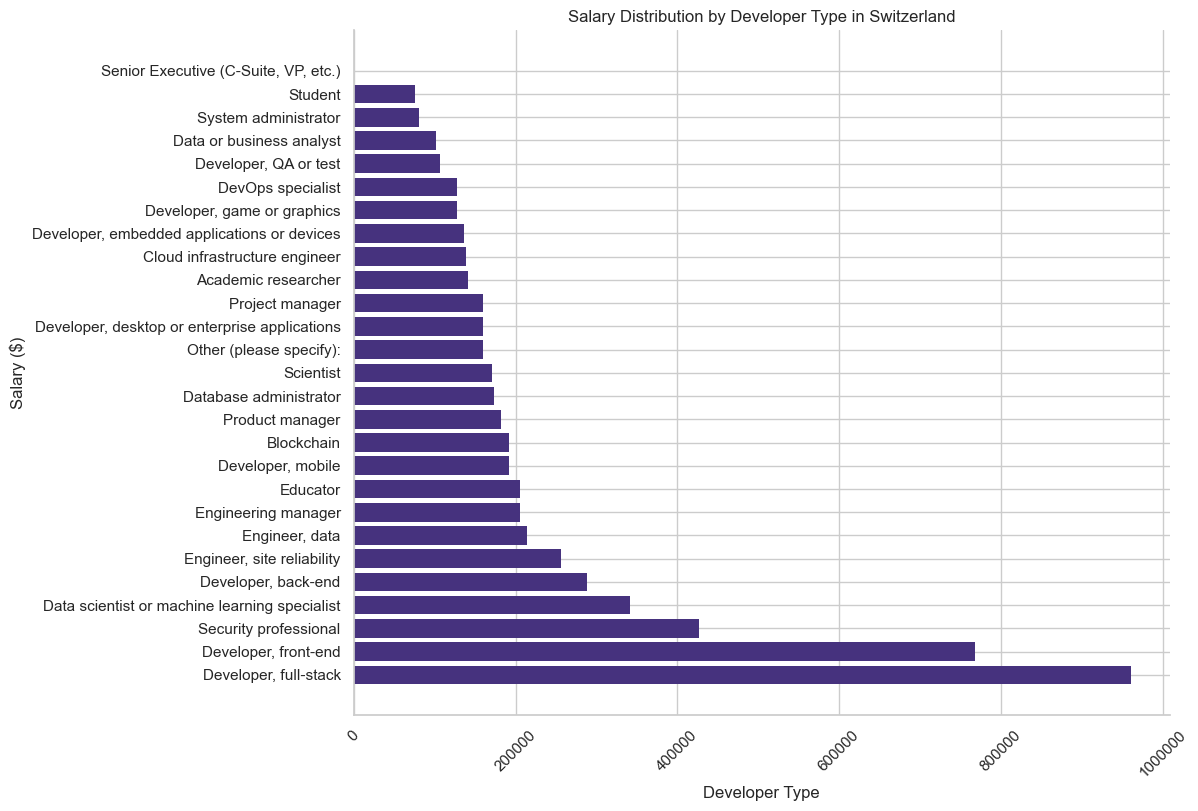

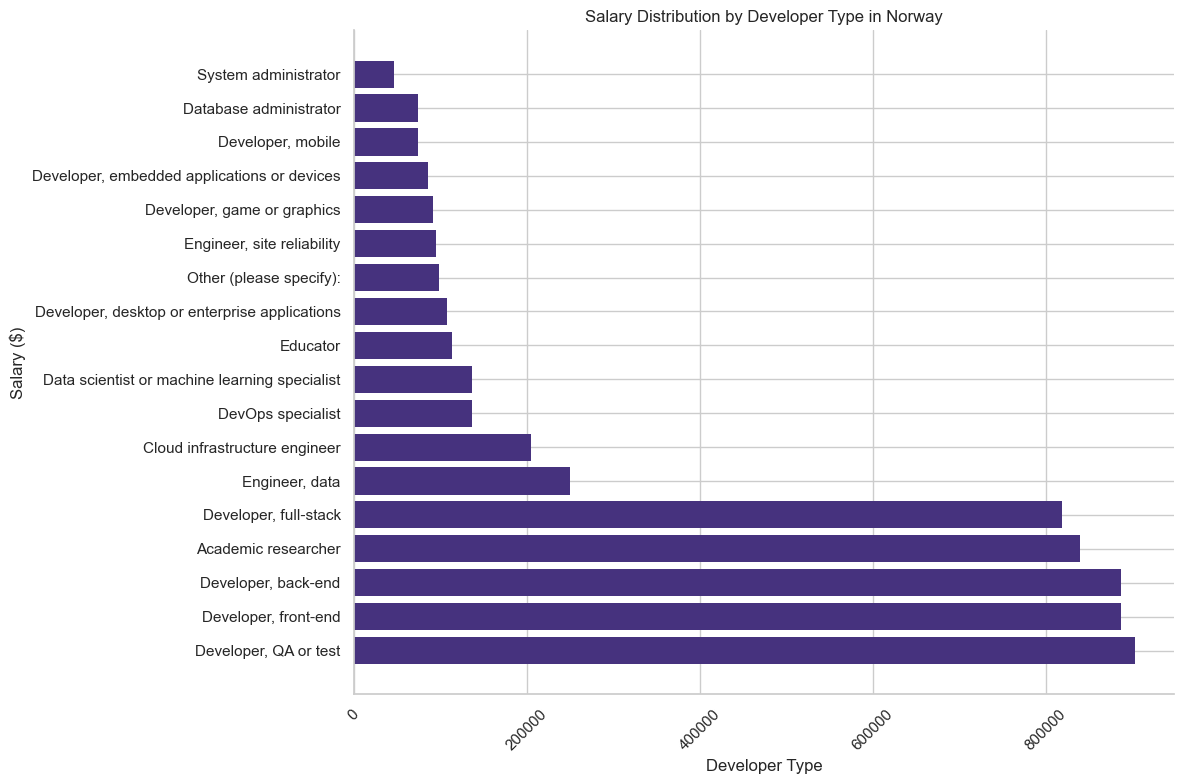

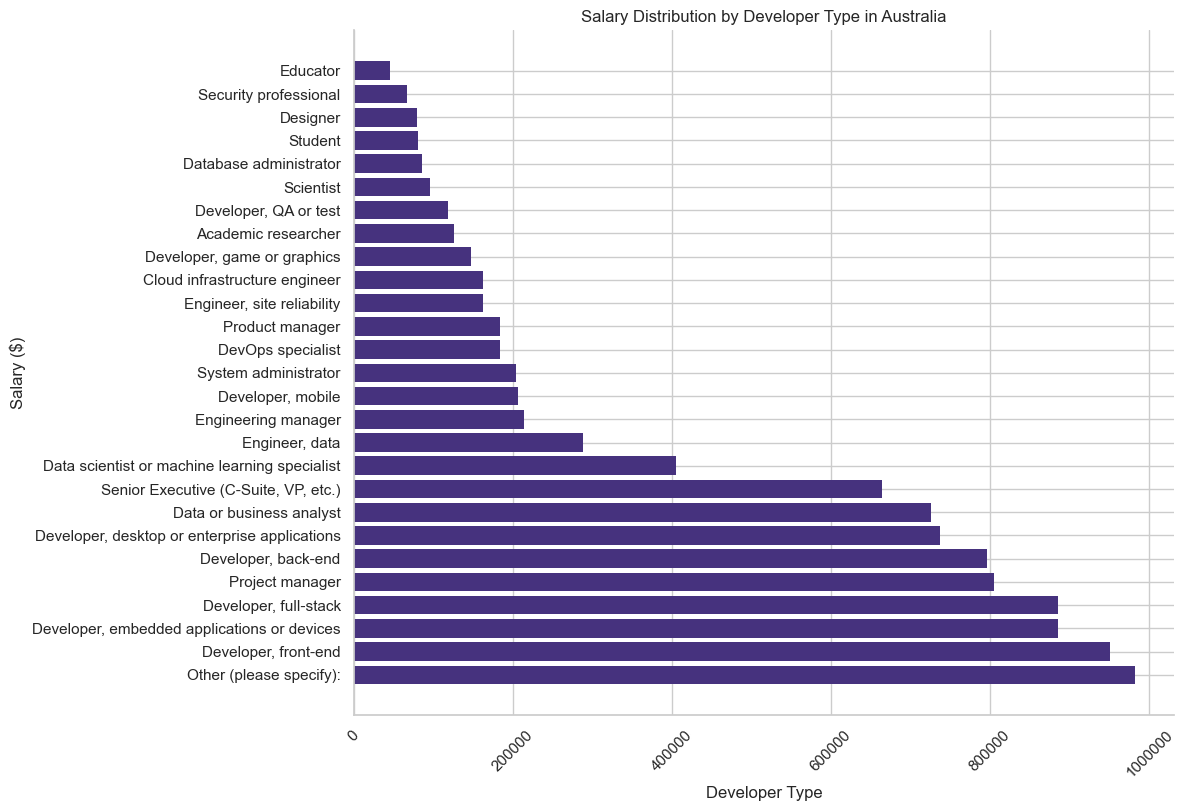

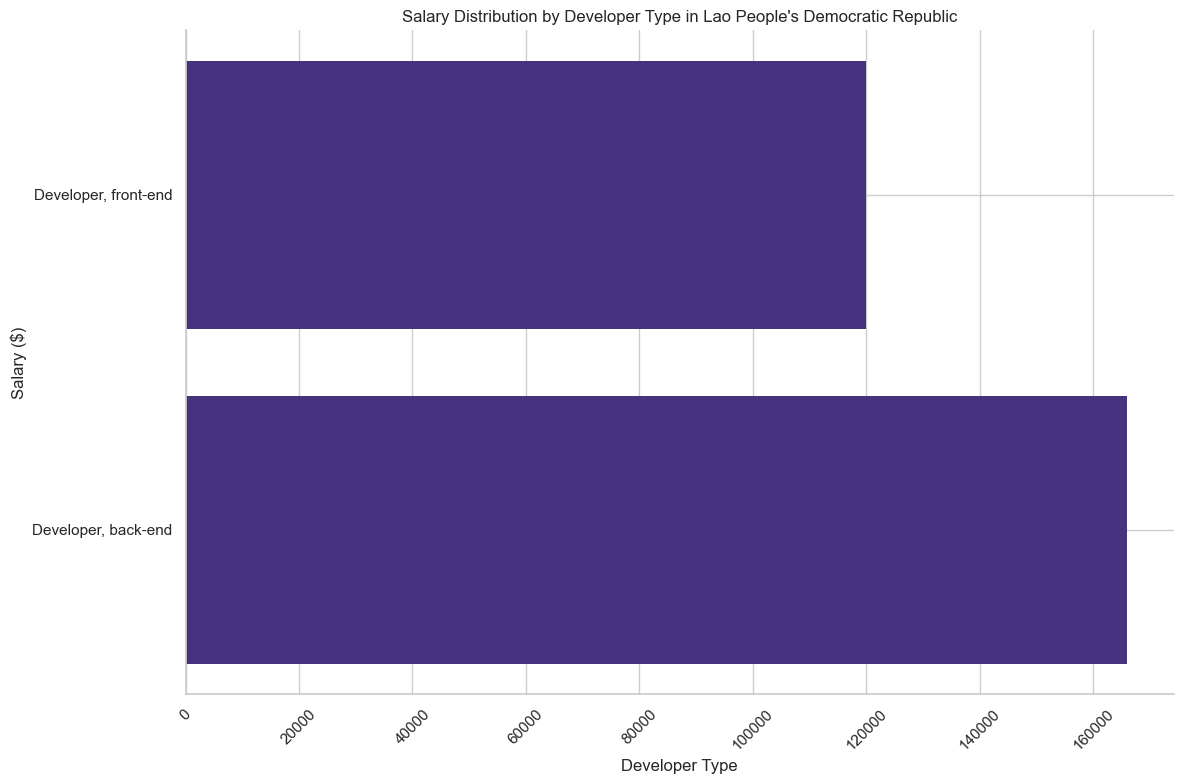

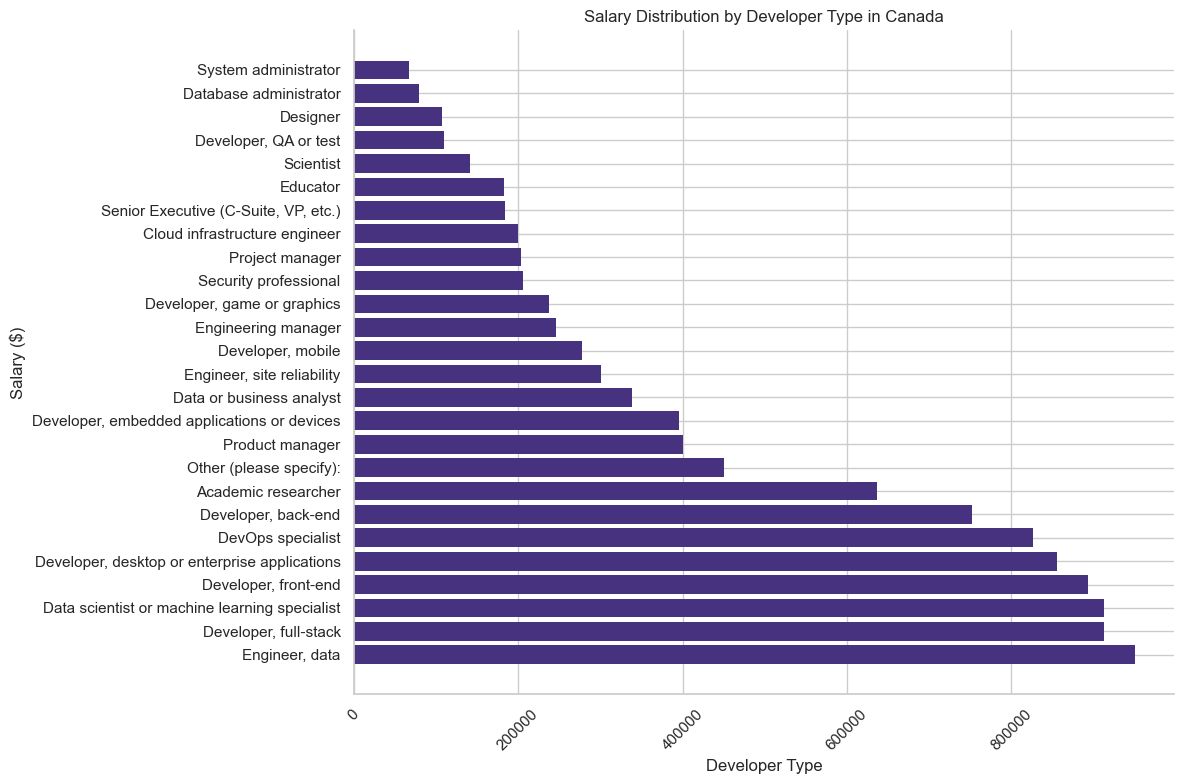

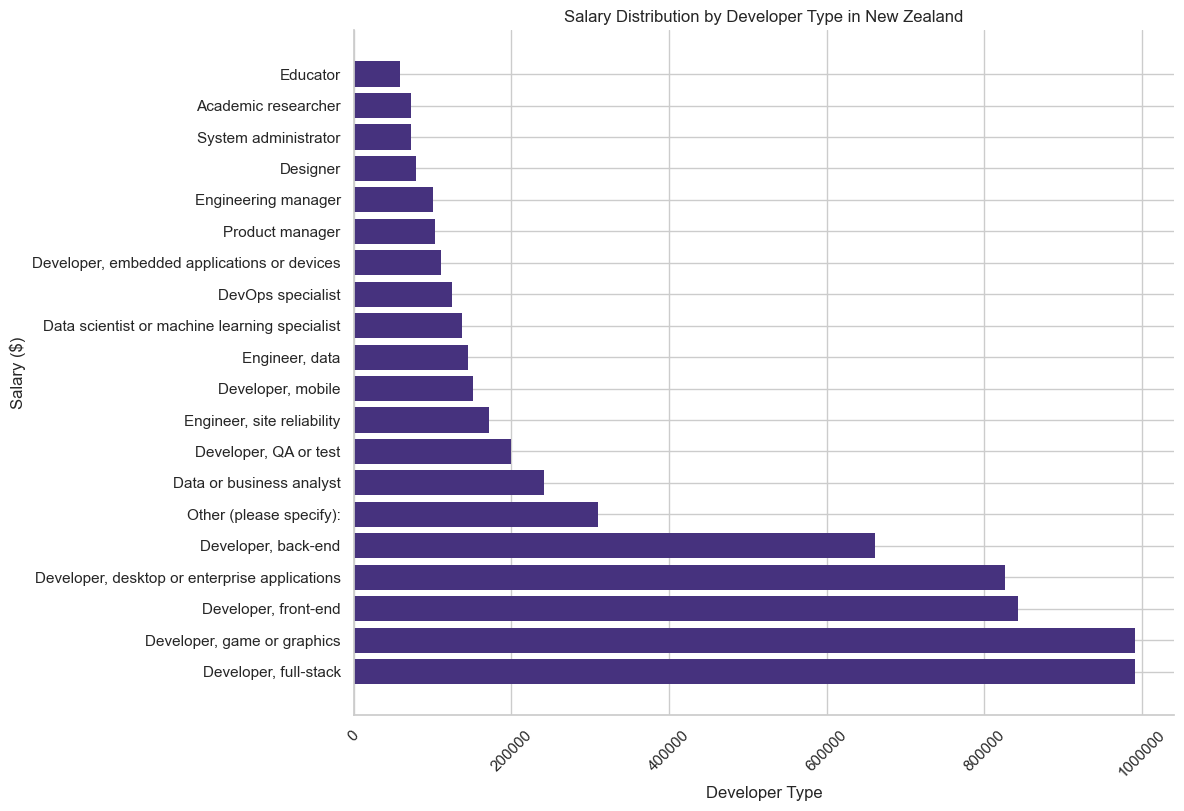

In [239]:
# Get a list of unique countries
countries = ['United States of America', 'Ireland', 'United Kingdom of Great Britain and Northern Ireland', 'Israel',
'Switzerland', 'Norway', 'Australia', "Lao People's Democratic Republic", 'Canada', 'New Zealand']

sns.set_palette('viridis')

# Plotting
for country in countries:
    country_data = merged_df_tree[merged_df_tree['Country'] == country]
    country_data_sorted = country_data.sort_values(by='CompinDollar', ascending=False)  # Sort by salary
    dev_types = country_data_sorted['DevType']
    salaries = country_data_sorted['CompinDollar']

    plt.figure(figsize=(12, 8))
    plt.barh(dev_types, salaries, edgecolor='none')
    plt.xlabel('Developer Type')
    plt.ylabel('Salary ($)')
    plt.title(f'Salary Distribution by Developer Type in {country}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()
    
    plt.ticklabel_format(axis='x', style='plain')

    plt.show()